# D·ª∞ ƒêO√ÅN GI√Å V√Ä PH√ÇN C·ª§M KIM C∆Ø∆†NG

## IMPORT C√ÅC TH∆Ø VI·ªÜN C·∫¶N THI·∫æT 

In [101]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import silhouette_score,davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
plt.rcParams.update({
    'font.size': 16,        # k√≠ch c·ª° font m·∫∑c ƒë·ªãnh cho to√†n b·ªô text trong bi·ªÉu ƒë·ªì
    'axes.titlesize': 18,   # font size cho ti√™u ƒë·ªÅ axes
    'axes.labelsize': 16,   # font size cho nh√£n tr·ª•c x,y
    'xtick.labelsize': 14,  # font size cho tick tr·ª•c x
    'ytick.labelsize': 14,  # font size cho tick tr·ª•c y
    'legend.fontsize': 14   # font size cho ch√∫ gi·∫£i legend
})

## D·ªÆ LI·ªÜU SAU KHI CRAWL

In [102]:
df = pd.read_csv('diamond_full_data.csv')
df.head()

carat color clarity        cut table   depth    measurements   price
0   0.54     G     SI2  Excellent  58 %  62.2 %   5.2x5.22x3.24    $989
1   0.52     F     SI1  Excellent  57 %  62.1 %  5.13x5.15x3.19  $1,111
2   0.50     E     SI1  Excellent  60 %  60.8 %  5.09x5.13x3.11  $1,197
3   0.50     E     SI1  Excellent  61 %  60.7 %  5.13x5.15x3.12  $1,225
4   0.50     H     VS2  Excellent  57 %  63.3 %  5.03x5.06x3.19  $1,155

In [103]:
print(df.info())
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11385 entries, 0 to 11384
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         11385 non-null  float64
 1   color         11385 non-null  object 
 2   clarity       11385 non-null  object 
 3   cut           11385 non-null  object 
 4   table         11385 non-null  object 
 5   depth         11385 non-null  object 
 6   measurements  11385 non-null  object 
 7   price         9107 non-null   object 
dtypes: float64(1), object(7)
memory usage: 711.7+ KB
None
carat              0
color              0
clarity            0
cut                0
table              0
depth              0
measurements       0
price           2278
dtype: int64


## DATA CLEANING

### DROP C√ÅC RECORDS B·ªä MISSING DATA ·ªû PRICE 

In [104]:
df.dropna(inplace=True)


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9107 entries, 0 to 11384
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         9107 non-null   float64
 1   color         9107 non-null   object 
 2   clarity       9107 non-null   object 
 3   cut           9107 non-null   object 
 4   table         9107 non-null   object 
 5   depth         9107 non-null   object 
 6   measurements  9107 non-null   object 
 7   price         9107 non-null   object 
dtypes: float64(1), object(7)
memory usage: 640.3+ KB


In [106]:
df.head()

carat color clarity        cut table   depth    measurements   price
0   0.54     G     SI2  Excellent  58 %  62.2 %   5.2x5.22x3.24    $989
1   0.52     F     SI1  Excellent  57 %  62.1 %  5.13x5.15x3.19  $1,111
2   0.50     E     SI1  Excellent  60 %  60.8 %  5.09x5.13x3.11  $1,197
3   0.50     E     SI1  Excellent  61 %  60.7 %  5.13x5.15x3.12  $1,225
4   0.50     H     VS2  Excellent  57 %  63.3 %  5.03x5.06x3.19  $1,155

### X√ìA ƒêI C√ÅC K√ç T·ª∞ $,% ,... T√ÅCH MEASUREMENTS TH√ÄNH X,Y,Z V√Ä √âP KI·ªÇU STRING -> FLOAT

In [107]:
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)


df['table'] = df['table'].str.replace(' %', '').astype(float)
df['depth'] = df['depth'].str.replace(' %', '').astype(float)

df['measurements'] = df['measurements'].str.replace('X', 'x')
df[["x", "y", "z"]] = df["measurements"].str.split("x", expand=True)

# (Tu·ª≥ ch·ªçn) Xo√° c·ªôt measurements g·ªëc
df.drop(columns=["measurements"], inplace=True)

# (Tu·ª≥ ch·ªçn) ƒê·ªïi ki·ªÉu x, y, z v·ªÅ float
df[["x", "y", "z","depth","table","carat"]] = df[["x", "y", "z","depth","table","carat"]].astype(float)


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\quock\AppData\Local\Temp\ipykernel_40392\488478571.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)


In [108]:
df.head()

carat color clarity        cut  table  depth   price     x     y     z
0   0.54     G     SI2  Excellent   58.0   62.2   989.0  5.20  5.22  3.24
1   0.52     F     SI1  Excellent   57.0   62.1  1111.0  5.13  5.15  3.19
2   0.50     E     SI1  Excellent   60.0   60.8  1197.0  5.09  5.13  3.11
3   0.50     E     SI1  Excellent   61.0   60.7  1225.0  5.13  5.15  3.12
4   0.50     H     VS2  Excellent   57.0   63.3  1155.0  5.03  5.06  3.19

In [109]:
df.describe()

carat        table        depth          price            x  \
count  9107.000000  9107.000000  9107.000000    9107.000000  9107.000000   
mean      0.924654    57.624245    62.103635    6022.932799     6.044038   
std       0.574320     1.504228     1.087881   18865.958721     0.937442   
min       0.500000    53.000000    57.400000     461.000000     4.890000   
25%       0.590000    57.000000    61.500000    1431.000000     5.370000   
50%       0.800000    58.000000    62.400000    2663.000000     5.890000   
75%       1.010000    59.000000    62.700000    4985.500000     6.380000   
max      10.290000    64.000000    65.300000  981619.000000    13.850000   

                 y            z  
count  9107.000000  9107.000000  
mean      6.078621     3.766365  
std       0.944968     0.599476  
min       4.950000     3.020000  
25%       5.400000     3.310000  
50%       5.930000     3.680000  
75%       6.410000     4.000000  
max      13.930000     8.680000

## CHIA D·ªÆ LI·ªÜU SAU KHI CLEAN TH√ÄNH 2 T·∫¨P TRAIN & TEST

### TR·ª∞C QUAN BI·∫æN M·ª§C TI√äU PRICE TR∆Ø·ªöC KHI CHIA 

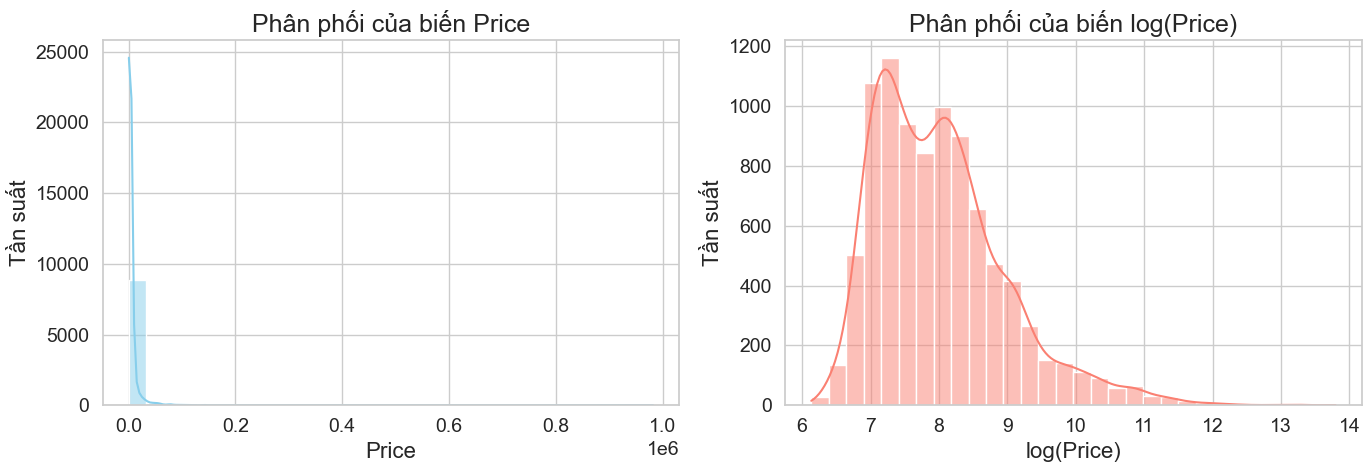

In [110]:

# T·∫°o th√™m c·ªôt log_price
df['log_price'] = np.log(df['price'])

# V·∫Ω 2 bi·ªÉu ƒë·ªì c·∫°nh nhau
plt.figure(figsize=(14, 5))

# Bi·ªÉu ƒë·ªì g·ªëc - Price
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='price', kde=True, bins=30, color='skyblue')
plt.title('Ph√¢n ph·ªëi c·ªßa bi·∫øn Price')
plt.xlabel('Price')
plt.ylabel('T·∫ßn su·∫•t')

# Bi·ªÉu ƒë·ªì log-transform
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='log_price', kde=True, bins=30, color='salmon')
plt.title('Ph√¢n ph·ªëi c·ªßa bi·∫øn log(Price)')
plt.xlabel('log(Price)')
plt.ylabel('T·∫ßn su·∫•t')

plt.tight_layout()
plt.show()


### TR·ª∞C QUAN TRUNG B√åNH LOG(PRICE) CHO T·ª™NG BI·∫æN DANH M·ª§C

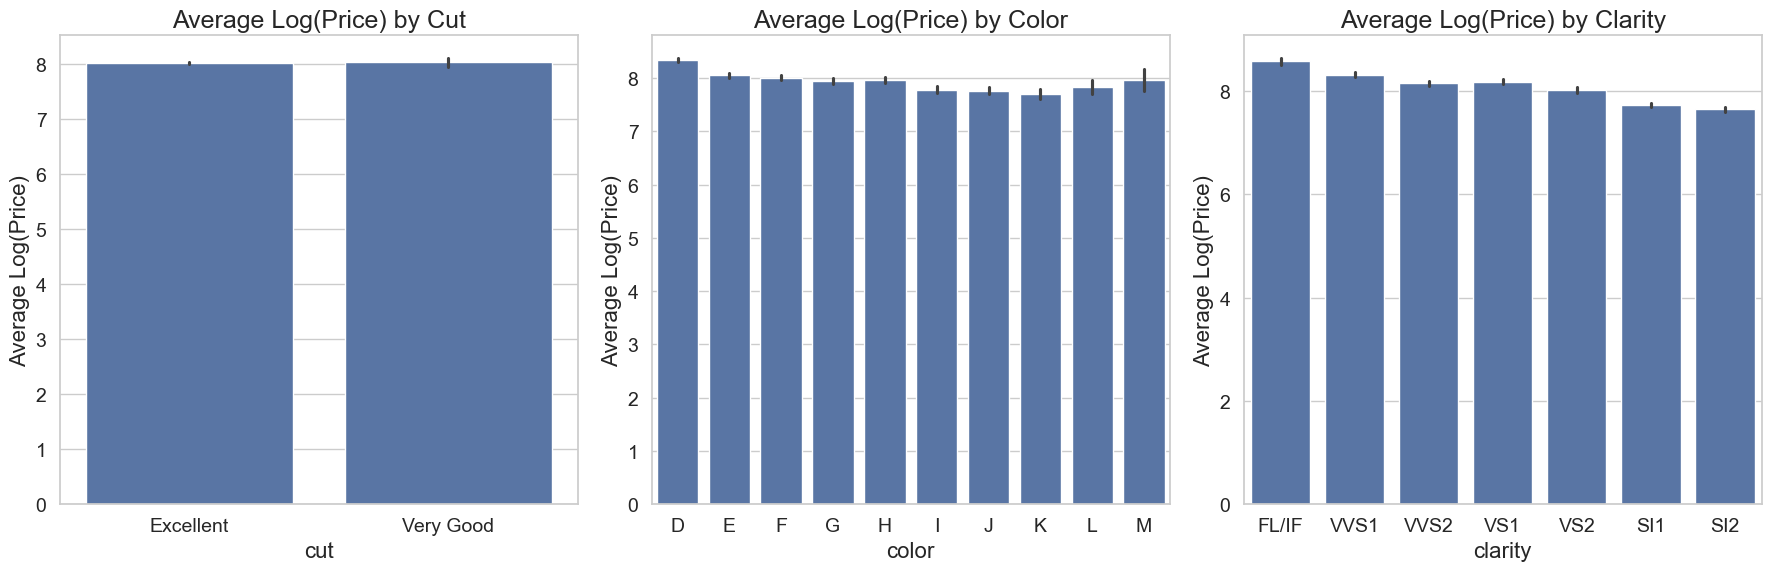

In [111]:
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']
clarity_order = ['FL/IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2']
plt.figure(figsize=(18, 6))

# Barplot c·ªßa trung b√¨nh log(price) theo 'cut'
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='cut', y='log_price', estimator=np.mean)
plt.title('Average Log(Price) by Cut')
plt.ylabel('Average Log(Price)')

# Barplot c·ªßa trung b√¨nh log(price) theo 'color'
plt.subplot(1, 3, 2)
sns.barplot(data=df, x='color', y='log_price', estimator=np.mean, order=color_order)
plt.title('Average Log(Price) by Color')
plt.ylabel('Average Log(Price)')

# Barplot c·ªßa trung b√¨nh log(price) theo 'clarity'
plt.subplot(1, 3, 3)
sns.barplot(data=df, x='clarity', y='log_price', estimator=np.mean,  order=clarity_order)
plt.title('Average Log(Price) by Clarity')
plt.ylabel('Average Log(Price)')

plt.tight_layout()
plt.show()

### CH·ªåN COLOR L√ÄM BI·∫æN PH√ÇN T·∫¶NG CH√çNH

In [112]:
df.head()

carat color clarity        cut  table  depth   price     x     y     z  \
0   0.54     G     SI2  Excellent   58.0   62.2   989.0  5.20  5.22  3.24   
1   0.52     F     SI1  Excellent   57.0   62.1  1111.0  5.13  5.15  3.19   
2   0.50     E     SI1  Excellent   60.0   60.8  1197.0  5.09  5.13  3.11   
3   0.50     E     SI1  Excellent   61.0   60.7  1225.0  5.13  5.15  3.12   
4   0.50     H     VS2  Excellent   57.0   63.3  1155.0  5.03  5.06  3.19   

   log_price  
0   6.896694  
1   7.013016  
2   7.087574  
3   7.110696  
4   7.051856

So s√°nh ph√¢n b·ªë c·ªßa bi·∫øn li√™n t·ª•c gi·ªØa Train v√† Test set:


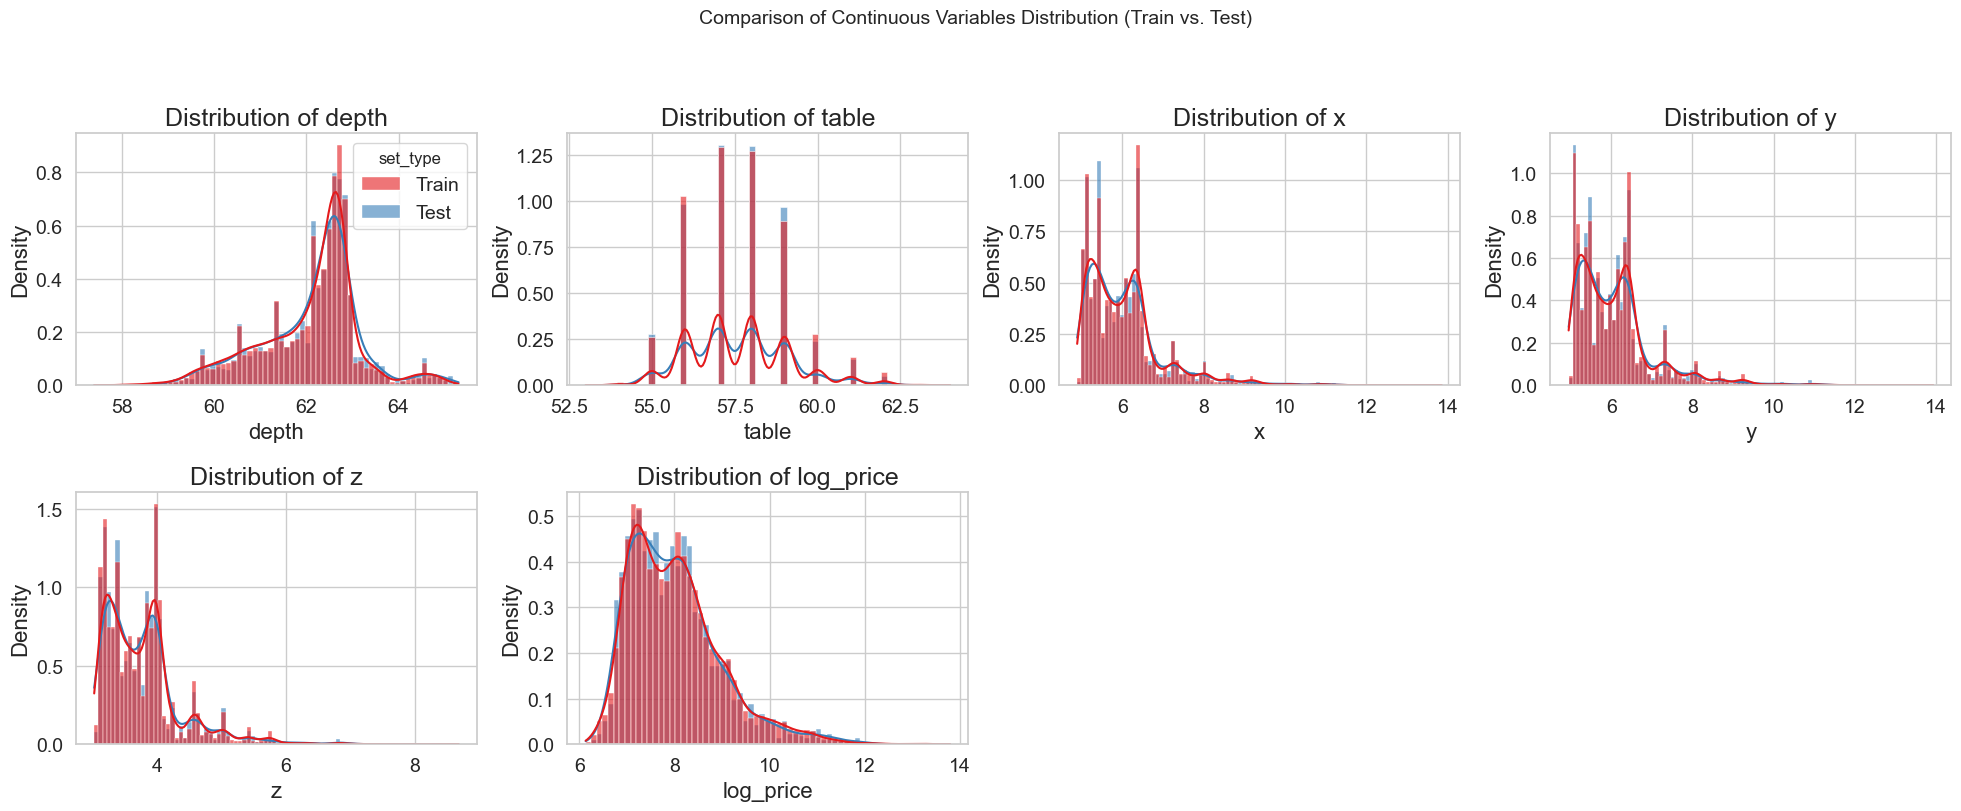


So s√°nh ph√¢n b·ªë c·ªßa bi·∫øn danh m·ª•c gi·ªØa Train v√† Test set:


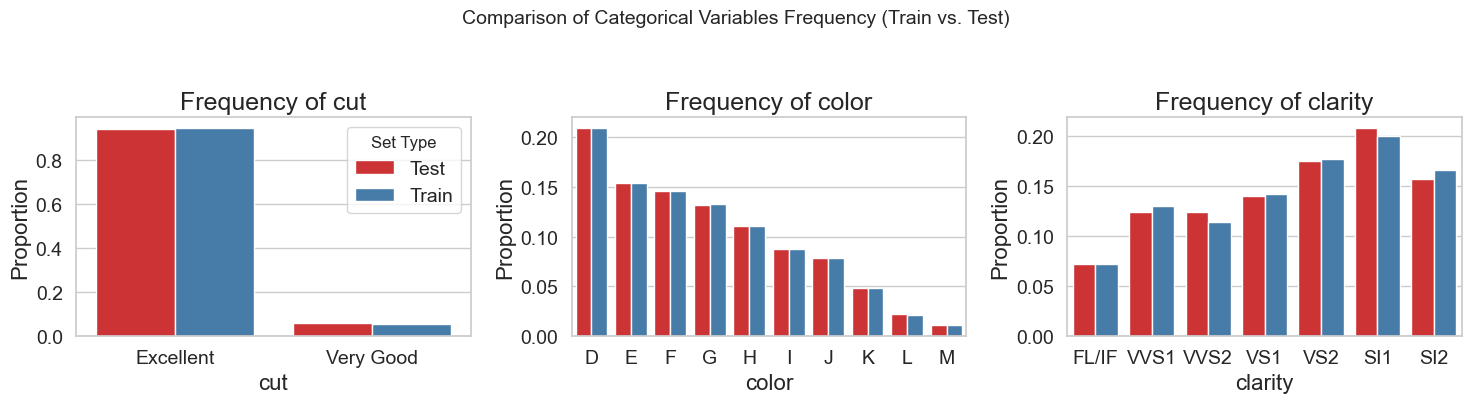

In [113]:
df_viz = df.copy() # T·∫°o m·ªôt b·∫£n sao ƒë·ªÉ th√™m c·ªôt '_set_type' m√† kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn df g·ªëc

X = df_viz.drop(['price', 'log_price'], axis=1) # C√°c bi·∫øn ƒë·ªôc l·∫≠p
y = df_viz['log_price'] # Bi·∫øn m·ª•c ti√™u

# Ph√¢n t·∫ßng theo 'color'
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X['color']
)

# G·∫Øn l·∫°i bi·∫øn m·ª•c ti√™u v√†o X_train v√† X_test ƒë·ªÉ d·ªÖ d√†ng visualize
X_train['log_price'] = y_train
X_test['log_price'] = y_test

# Th√™m c·ªôt nh·∫≠n d·∫°ng 'set_type' v√†o m·ªói t·∫≠p ƒë·ªÉ ph√¢n bi·ªát khi v·∫Ω
X_train['set_type'] = 'Train'
X_test['set_type'] = 'Test'

# N·ªëi l·∫°i X_train v√† X_test ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì so s√°nh d·ªÖ d√†ng h∆°n
combined_df = pd.concat([X_train, X_test])  
# --- Danh s√°ch c√°c bi·∫øn ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì ---
categorical_vars = ['cut', 'color', 'clarity']
continuous_vars = ['depth', 'table', 'x','y','z', 'log_price']

# --- ƒê·∫∑t l·∫°i k√≠ch th∆∞·ªõc font cho c√°c nh√£n bi·ªÉu ƒë·ªì ---


# --- C√†i ƒë·∫∑t palette m√†u s·∫Øc t∆∞∆°ng ph·∫£n r√µ r√†ng ---
custom_palette = sns.color_palette("Set1", n_colors=2) # V√≠ d·ª•: m√†u ƒë·ªè v√† xanh

# --- V·∫Ω bi·ªÉu ƒë·ªì cho bi·∫øn li√™n t·ª•c (Histogram) tr√™n c√πng m·ªôt Figure ---
print("So s√°nh ph√¢n b·ªë c·ªßa bi·∫øn li√™n t·ª•c gi·ªØa Train v√† Test set:")
# X√°c ƒë·ªãnh s·ªë l∆∞·ª£ng h√†ng v√† c·ªôt cho subplot
num_cont_vars = len(continuous_vars)
n_cols_cont = 4 # S·ªë c·ªôt b·∫°n mu·ªën hi·ªÉn th·ªã
n_rows_cont = (num_cont_vars + n_cols_cont - 1) // n_cols_cont # T√≠nh s·ªë h√†ng c·∫ßn thi·∫øt

fig_cont, axes_cont = plt.subplots(n_rows_cont, n_cols_cont, figsize=(5 * n_cols_cont, 4 * n_rows_cont))
axes_cont = axes_cont.flatten() # Bi·∫øn ƒë·ªïi m·∫£ng axes 2D th√†nh 1D ƒë·ªÉ d·ªÖ l·∫∑p

for i, var in enumerate(continuous_vars):
    ax = axes_cont[i]
    sns.histplot(data=combined_df, x=var, hue='set_type', kde=True, palette=custom_palette,
                 stat='density', common_norm=False, ax=ax, alpha=0.6) # Th√™m alpha ƒë·ªÉ d·ªÖ nh√¨n khi ch·ªìng l√™n
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    
    if i != 0: # X√≥a legend ·ªü c√°c subplot c√≤n l·∫°i sau khi ƒë√£ ƒë·∫∑t ti√™u ƒë·ªÅ cho c√°i ƒë·∫ßu ti√™n
            ax.get_legend().remove()

# X√≥a c√°c subplot tr·ªëng n·∫øu c√≥
for j in range(i + 1, len(axes_cont)):
    fig_cont.delaxes(axes_cont[j])

plt.suptitle('Comparison of Continuous Variables Distribution (Train vs. Test)', y=1.02, fontsize=14) # Ti√™u ƒë·ªÅ chung cho figure
plt.tight_layout(rect=[0, 0, 1, 0.98]) # ƒêi·ªÅu ch·ªânh layout ƒë·ªÉ kh√¥ng b·ªã c·∫Øt ti√™u ƒë·ªÅ
plt.show()

# --- V·∫Ω bi·ªÉu ƒë·ªì cho bi·∫øn danh m·ª•c (Barplot v·ªõi t·∫ßn s·ªë) tr√™n c√πng m·ªôt Figure ---
print("\nSo s√°nh ph√¢n b·ªë c·ªßa bi·∫øn danh m·ª•c gi·ªØa Train v√† Test set:")
num_cat_vars = len(categorical_vars)
n_cols_cat = 3
n_rows_cat = (num_cat_vars + n_cols_cat - 1) // n_cols_cat

fig_cat, axes_cat = plt.subplots(n_rows_cat, n_cols_cat, figsize=(5 * n_cols_cat, 4 * n_rows_cat))
axes_cat = axes_cat.flatten()

for i, var in enumerate(categorical_vars):
    ax = axes_cat[i]

    # T√≠nh to√°n t·∫ßn s·ªë (t·ª∑ l·ªá ph·∫ßn trƒÉm)
    # Group by var v√† set_type, sau ƒë√≥ t√≠nh s·ªë l∆∞·ª£ng v√† chuy·ªÉn th√†nh t·ª∑ l·ªá
    df_freq = combined_df.groupby('set_type')[var].value_counts(normalize=True).rename('proportion').reset_index()

    # S·∫Øp x·∫øp c√°c c·∫•p ƒë·ªô cho d·ªÖ nh√¨n n·∫øu l√† bi·∫øn ordinal
    order = None
    if var == 'color':
        order = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']
    elif var == 'clarity':
        order = ['FL/IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2'] # ƒê·∫£m b·∫£o th√™m I1, I2, I3 n·∫øu c√≥
    elif var == 'cut':
        order = ['Excellent', 'Very Good'] # ƒê·∫£m b·∫£o th√™m c√°c lo·∫°i kh√°c n·∫øu c√≥

    sns.barplot(data=df_freq, x=var, y='proportion', hue='set_type', palette=custom_palette, order=order, ax=ax)
    ax.set_title(f'Frequency of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Proportion')
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') # Xoay nh√£n n·∫øu c·∫ßn
    if i == 0: # Ch·ªâ hi·ªÉn th·ªã legend cho subplot ƒë·∫ßu ti√™n
        ax.legend(title='Set Type')
    else:
        ax.get_legend().remove() # X√≥a legend ·ªü c√°c subplot c√≤n l·∫°i

# X√≥a c√°c subplot tr·ªëng n·∫øu c√≥
for j in range(i + 1, len(axes_cat)):
    fig_cat.delaxes(axes_cat[j])

plt.suptitle('Comparison of Categorical Variables Frequency (Train vs. Test)', y=1.02, fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [114]:
df.drop(columns=['log_price'], inplace=True)  # Xo√° c·ªôt log_price sau khi ƒë√£ s·ª≠ d·ª•ng

In [115]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X['color']
)


In [116]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [117]:
df_train.to_csv('clean_data_train.csv', index=False)
df_test.to_csv('clean_data_test.csv', index=False)

## DATA ENGINEERING

### BI·∫æN M·ª§C TI√äU - PRICE
#### ‚úÖ ∆Øu ƒëi·ªÉm sau log-transform:

| **Y·∫øu t·ªë**              | **Tr∆∞·ªõc log-transform (price)** | **Sau log-transform (log(price))**     |
|-------------------------|----------------------------------|----------------------------------------|
| **Skewness**            | L·ªách ph·∫£i m·∫°nh                   | G·∫ßn chu·∫©n h∆°n                          |
| **Hi·ªÉn th·ªã chi ti·∫øt**   | B·ªã n√©n ph·∫ßn th·∫•p                 | Tr·∫£i ƒë·ªÅu, d·ªÖ nh√¨n h∆°n                  |
| **Quan s√°t ph√¢n c·ª•m**   | Kh√¥ng r√µ r√†ng                    | C√≥ th·ªÉ th·∫•y ƒë∆∞·ª£c **2 c·ª•m gi√°**         |

* M·ªôt mode ch√≠nh n·∫±m kho·∫£ng log(price) ‚âà 7.5 (t∆∞∆°ng ƒë∆∞∆°ng v·ªõi kho·∫£ng 1,800 USD).

* M·ªôt mode ph·ª• nh·ªè h∆°n ·ªü kho·∫£ng log(price) ‚âà 8.5 (t∆∞∆°ng ƒë∆∞∆°ng 5,000 USD).




In [118]:
df_train['log_price'] = np.log(df_train['price'])

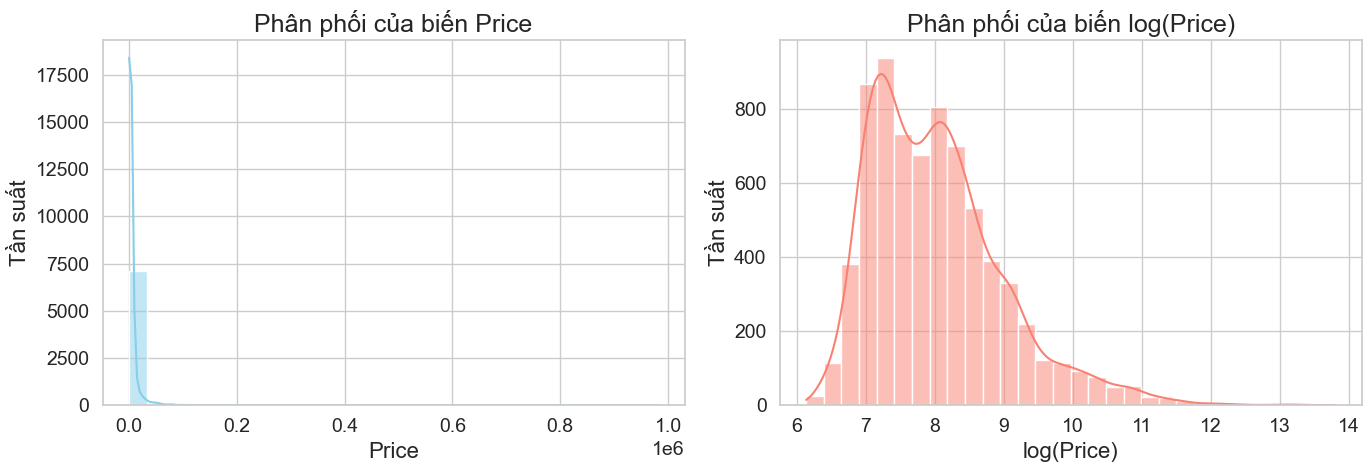

In [119]:
# V·∫Ω 2 bi·ªÉu ƒë·ªì c·∫°nh nhau
plt.figure(figsize=(14, 5))

# Bi·ªÉu ƒë·ªì g·ªëc - Price
plt.subplot(1, 2, 1)
sns.histplot(data=df_train, x='price', kde=True, bins=30, color='skyblue')
plt.title('Ph√¢n ph·ªëi c·ªßa bi·∫øn Price')
plt.xlabel('Price')
plt.ylabel('T·∫ßn su·∫•t')

# Bi·ªÉu ƒë·ªì log-transform
plt.subplot(1, 2, 2)
sns.histplot(data=df_train, x='log_price', kde=True, bins=30, color='salmon')
plt.title('Ph√¢n ph·ªëi c·ªßa bi·∫øn log(Price)')
plt.xlabel('log(Price)')
plt.ylabel('T·∫ßn su·∫•t')

plt.tight_layout()
plt.show()


### TR·ª∞C QUAN M·ªêI LI√äN H·ªÜ BI·∫æN DANH M·ª§C - PRICE

#### COUNTPLOT CHO BI·∫æN DANH M·ª§C

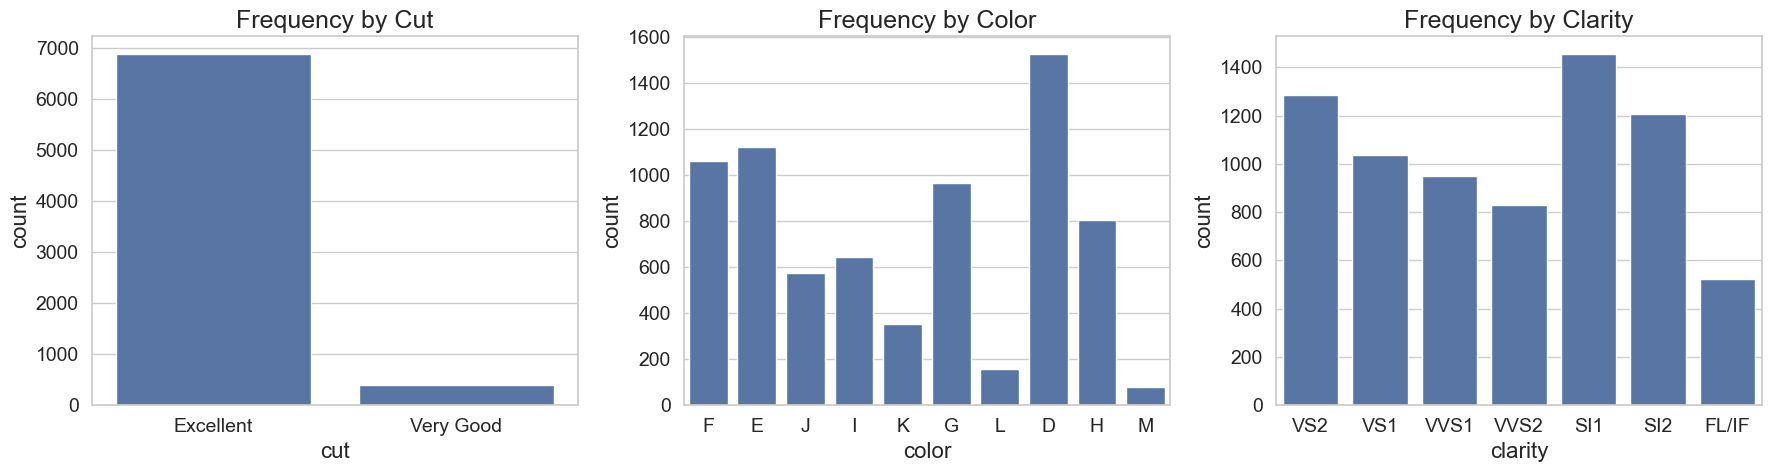

In [120]:

plt.figure(figsize=(18, 5))

# Countplot theo 'cut'
plt.subplot(1, 3, 1)
sns.countplot(data=df_train, x='cut')
plt.title('Frequency by Cut')

# Countplot theo 'color'
plt.subplot(1, 3, 2)
sns.countplot(data=df_train, x='color')
plt.title('Frequency by Color')

# Countplot theo 'clarity'
plt.subplot(1, 3, 3)
sns.countplot(data=df_train, x='clarity')
plt.title('Frequency by Clarity')

plt.tight_layout()
plt.show()



#### BI·∫æN DANH M·ª§C - LOG(PRICE)

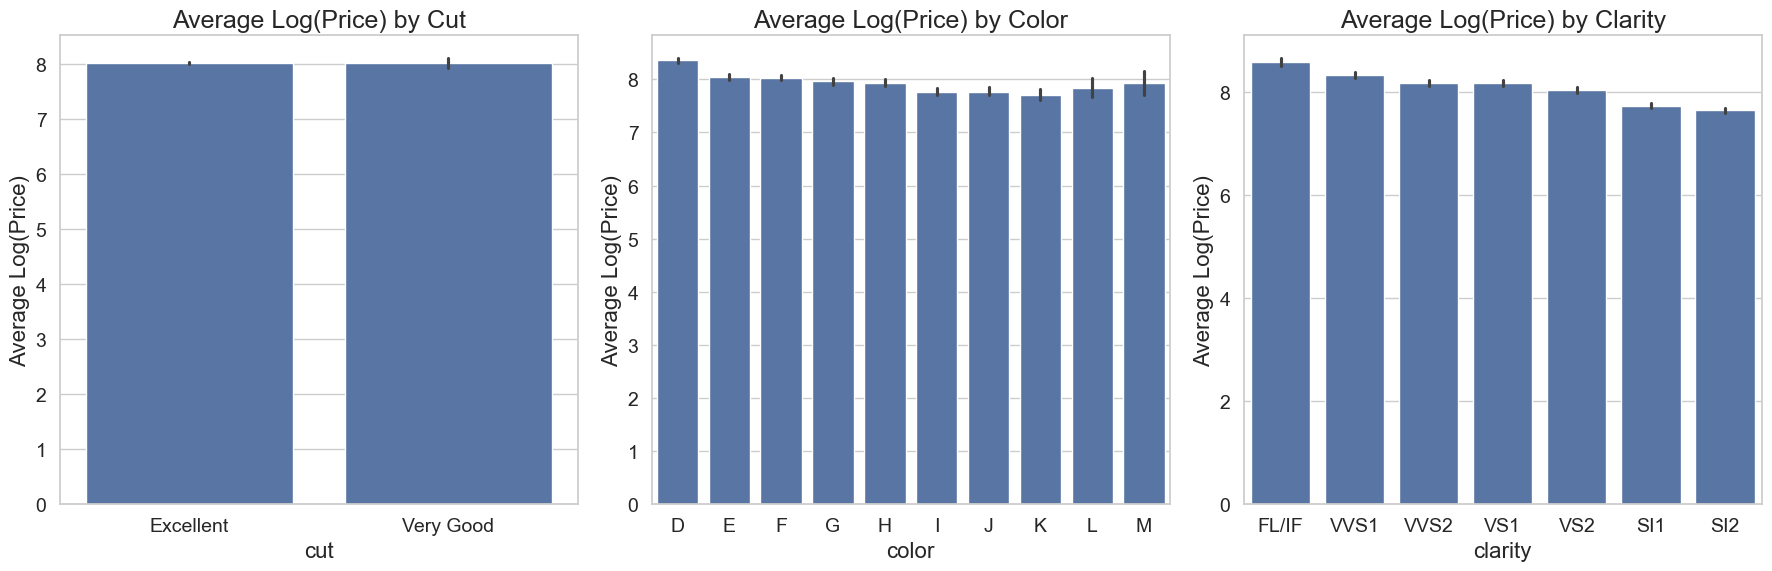

In [121]:
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']
clarity_order = ['FL/IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2']
plt.figure(figsize=(18, 6))

# Barplot c·ªßa trung b√¨nh log(price) theo 'cut'
plt.subplot(1, 3, 1)
sns.barplot(data=df_train, x='cut', y='log_price', estimator=np.mean)
plt.title('Average Log(Price) by Cut')
plt.ylabel('Average Log(Price)')

# Barplot c·ªßa trung b√¨nh log(price) theo 'color'
plt.subplot(1, 3, 2)
sns.barplot(data=df_train, x='color', y='log_price', estimator=np.mean, order=color_order)
plt.title('Average Log(Price) by Color')
plt.ylabel('Average Log(Price)')

# Barplot c·ªßa trung b√¨nh log(price) theo 'clarity'
plt.subplot(1, 3, 3)
sns.barplot(data=df_train, x='clarity', y='log_price', estimator=np.mean,  order=clarity_order)
plt.title('Average Log(Price) by Clarity')
plt.ylabel('Average Log(Price)')

plt.tight_layout()
plt.show()

### TR·ª∞C QUAN M·ªêI QUAN H·ªÜ GI·ªÆA BI·∫æN LI√äN T·ª§C - PRICE 

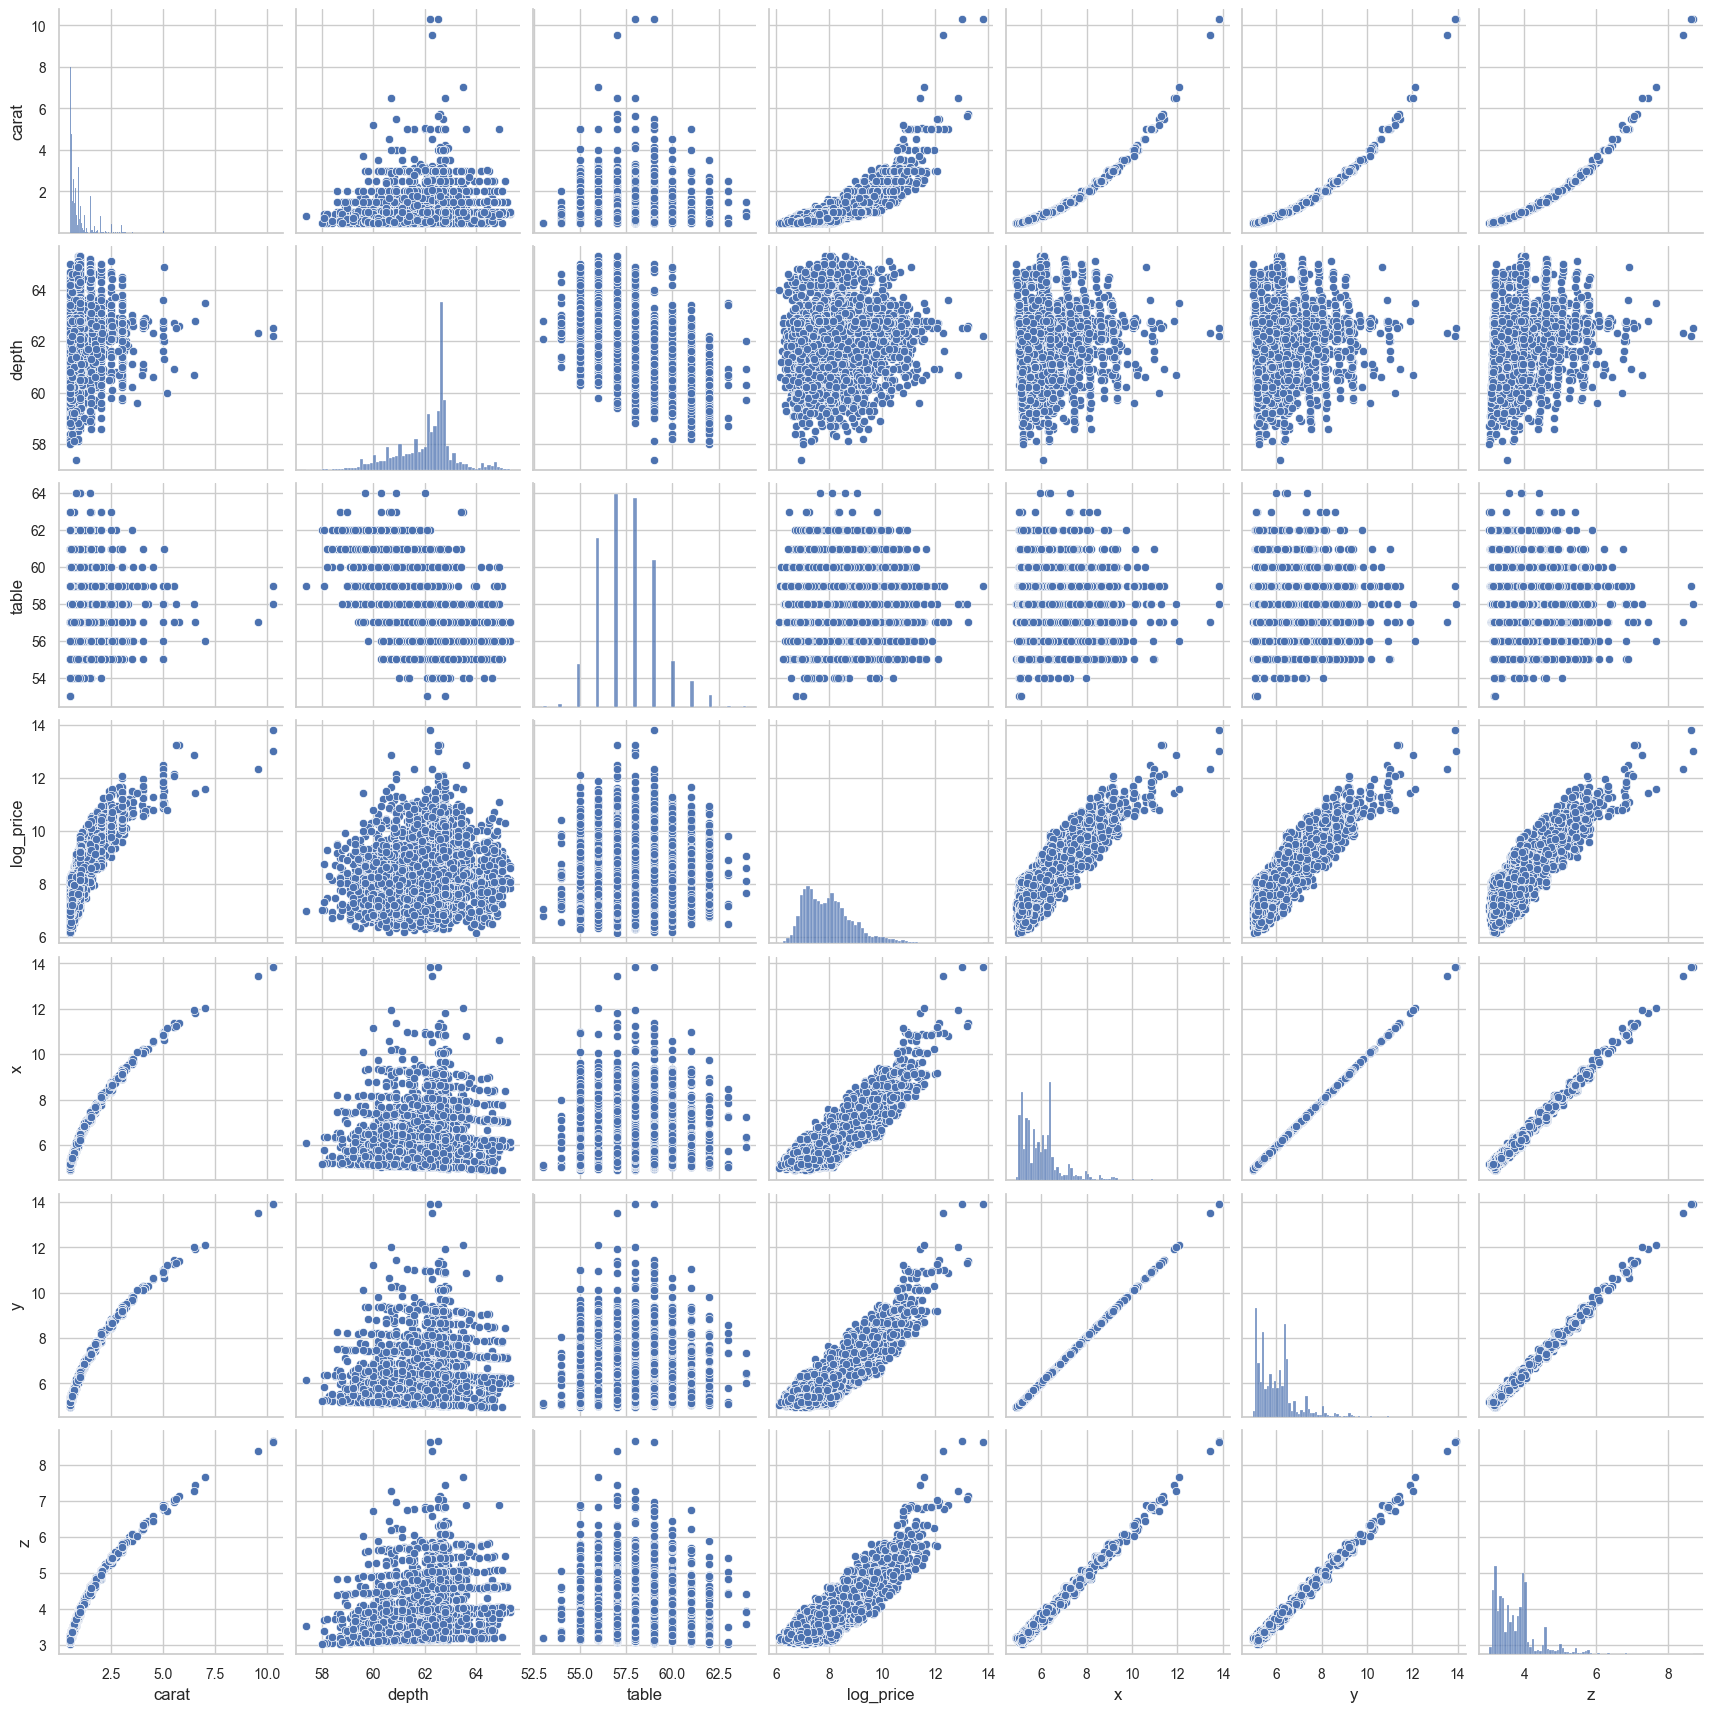

In [122]:
# Ch·ªçn c√°c c·ªôt li√™n t·ª•c


plt.rcParams['axes.labelsize'] = 12 # K√≠ch th∆∞·ªõc font cho nh√£n tr·ª•c x v√† y
plt.rcParams['xtick.labelsize'] = 10 # K√≠ch th∆∞·ªõc font cho c√°c s·ªë tr√™n tr·ª•c x
plt.rcParams['ytick.labelsize'] = 10 # K√≠ch th∆∞·ªõc font cho c√°c s·ªë tr√™n tr·ª•c y
continuous_vars = ['carat', 'depth', 'table', 'log_price', 'x', 'y', 'z']
sns.pairplot(df_train[continuous_vars])
plt.show()



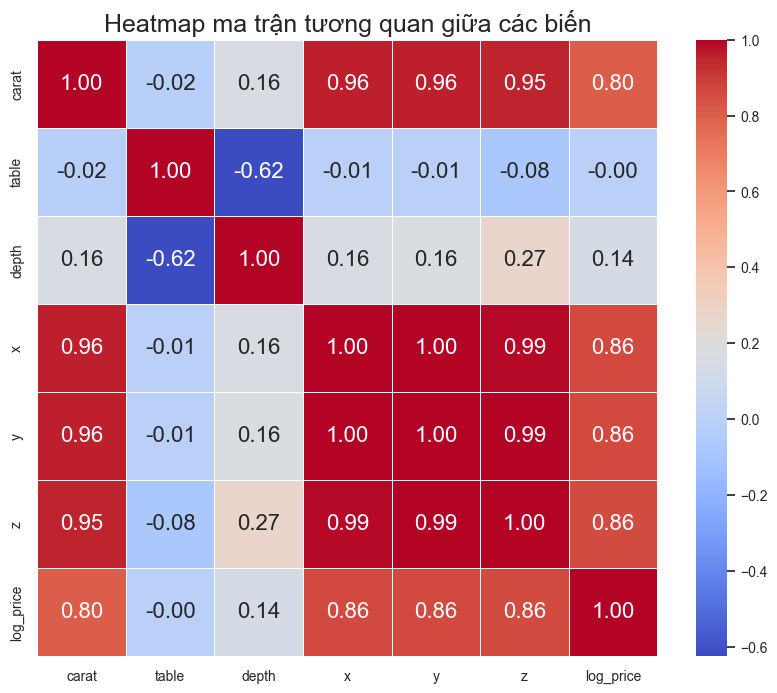

In [123]:


# T√≠nh ma tr·∫≠n t∆∞∆°ng quan
corr = df_train.drop(['price'],axis =1).corr(numeric_only=True)

# V·∫Ω heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn')
plt.show()


### V·∫§N ƒê·ªÄ ƒêA C·ªòNG TUY·∫æN (CARAT,X,Y,Z)

In [124]:


# Gi·∫£ s·ª≠ df l√† DataFrame ch·ª©a d·ªØ li·ªáu c·ªßa b·∫°n
df_MCL = df_train[['carat','x','y','z']]

# Th√™m c·ªôt h·∫±ng s·ªë (intercept)


In [125]:
vif_data = pd.DataFrame()
vif_data["Variable"] = df_MCL.columns
vif_data["VIF"] = [variance_inflation_factor(df_MCL.values, i)
                   for i in range(df_MCL.shape[1])]

print(vif_data)

  Variable            VIF
0    carat       6.449352
1        x  264980.635469
2        y  286008.760419
3        z    3714.791113


#### QUY·∫æT ƒê·ªäNH GI·ªÆ L·∫†I BI·∫æN X V√Ä LO·∫†I B·ªé ƒêI CARAT,Y,Z
* X c√≥ t∆∞∆°ng quan tuy·∫øn t√≠nh cao h∆°n so v·ªõi CARAT
* Lo·∫°i b·ªè ƒëi CARAT,Y,Z ƒë·ªÉ tr√°nh d∆∞ th·ª´a c≈©ng nh∆∞ c√°c ·∫£nh h∆∞·ªüng c·ªßa ƒëa c·ªông tuy·∫øn ƒë·∫øn m√¥ h√¨nh 

In [126]:
df_train.drop(columns=["carat", "y", "z"], inplace=True)

In [127]:
df_train.head()

color clarity        cut  table  depth     x   price  log_price
4101     F     VS2  Excellent   62.0   62.0  5.04  1401.0   7.244942
3146     F     VS1  Excellent   56.0   62.3  5.33  1467.0   7.290975
7106     E    VVS1  Excellent   58.0   62.7  5.10  2282.0   7.732808
1892     F    VVS2  Excellent   60.0   60.2  6.51  8483.0   9.045819
721      J    VVS1  Excellent   59.0   60.0  5.44  1215.0   7.102499

### Data Encoding and Normalization

In [128]:
X_train =df_train.drop(['price', 'log_price'], axis=1)
y_train = df_train['log_price']

In [129]:
numerical_cols = ['depth', 'table', 'x']
categorical_cols = ['cut', 'color', 'clarity']

In [130]:
cut_categories = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
color_categories = ['M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D'] # T·ª´ k√©m nh·∫•t (0) ƒë·∫øn t·ªët nh·∫•t (9)
clarity_categories = ['SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'FL/IF'] # T·ª´ k√©m nh·∫•t (0) ƒë·∫øn t·ªët nh·∫•t (6)
scaler = StandardScaler()
# Kh·ªüi t·∫°o OrdinalEncoder cho t·ª´ng c·ªôt danh m·ª•c
# Ch√∫ng ta s·∫Ω x·ª≠ l√Ω t·ª´ng c·ªôt ri√™ng bi·ªát
encoder_cut = OrdinalEncoder(categories=[cut_categories], handle_unknown='use_encoded_value', unknown_value=-1)
encoder_color = OrdinalEncoder(categories=[color_categories], handle_unknown='use_encoded_value', unknown_value=-1)
encoder_clarity = OrdinalEncoder(categories=[clarity_categories], handle_unknown='use_encoded_value', unknown_value=-1)
# 2. FIT (H·ªçc tham s·ªë) tr√™n X_train v√† TRANSFORM cho c·∫£ X_train v√† X_test
# --- X·ª≠ l√Ω bi·∫øn li√™n t·ª•c ---
# Fit scaler tr√™n X_train c·ªßa c√°c c·ªôt s·ªë
scaler.fit(X_train[numerical_cols])

# Transform X_train v√† X_test s·ª≠ d·ª•ng scaler ƒë√£ fit
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
# --- X·ª≠ l√Ω bi·∫øn danh m·ª•c ---
# Fit v√† Transform cho 'cut'
encoder_cut.fit(X_train[['cut']])
X_train['cut'] = encoder_cut.transform(X_train[['cut']])
# Fit v√† Transform cho 'color'
encoder_color.fit(X_train[['color']])
X_train['color'] = encoder_color.transform(X_train[['color']])
# Fit v√† Transform cho 'clarity'
encoder_clarity.fit(X_train[['clarity']])
X_train['clarity'] = encoder_clarity.transform(X_train[['clarity']])

In [131]:
X_train.head()

color  clarity  cut     table     depth         x
4101    7.0      2.0  4.0  2.885633 -0.087444 -1.071687
3146    7.0      3.0  4.0 -1.073406  0.187454 -0.763070
7106    8.0      5.0  4.0  0.246274  0.553986 -1.007835
1892    7.0      4.0  4.0  1.565953 -1.736837  0.492683
721     3.0      5.0  4.0  0.906114 -1.920103 -0.646008

In [132]:
y_train.head()

4101    7.244942
3146    7.290975
7106    7.732808
1892    9.045819
721     7.102499
Name: log_price, dtype: float64

## √ÅP D·ª§NG DATA ENGINEERING AND ENCODING & NORMALIZATION CHO T·∫¨P TEST 

In [133]:
df_test.head()

carat color clarity        cut  table  depth      x      y     z  \
10048   1.00     J     SI2  Excellent   59.0   61.9   6.40   6.43  3.97   
9120    5.31     L     SI1  Excellent   56.0   61.8  11.17  11.21  6.91   
9074    0.90     E     SI1  Very Good   62.0   62.8   6.02   6.10  3.81   
10259   0.59     D     SI1  Excellent   57.0   62.6   5.34   5.37  3.35   
9891    0.59     F     SI1  Excellent   59.0   59.6   5.46   5.48  3.26   

         price  
10048   1847.0  
9120   55729.0  
9074    2826.0  
10259   1316.0  
9891    1053.0

In [134]:
df_test['log_price'] = np.log(df_test['price'])

In [135]:
X_test = df_test.drop(['price', 'log_price'], axis=1)
y_test = df_test['log_price']

In [136]:
X_test.head()

carat color clarity        cut  table  depth      x      y     z
10048   1.00     J     SI2  Excellent   59.0   61.9   6.40   6.43  3.97
9120    5.31     L     SI1  Excellent   56.0   61.8  11.17  11.21  6.91
9074    0.90     E     SI1  Very Good   62.0   62.8   6.02   6.10  3.81
10259   0.59     D     SI1  Excellent   57.0   62.6   5.34   5.37  3.35
9891    0.59     F     SI1  Excellent   59.0   59.6   5.46   5.48  3.26

In [137]:
X_test.drop(columns=["carat", "y", "z"], inplace=True)
# --- X·ª≠ l√Ω bi·∫øn li√™n t·ª•c ---
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
# --- X·ª≠ l√Ω bi·∫øn danh m·ª•c ---
# Transform cho 'cut'
X_test['cut'] = encoder_cut.transform(X_test[['cut']])
# Transform cho 'color'
X_test['color'] = encoder_color.transform(X_test[['color']])
# Transform cho 'clarity'
X_test['clarity'] = encoder_clarity.transform(X_test[['clarity']])
X_test.head()

color  clarity  cut     table     depth         x
10048    3.0      0.0  4.0  0.906114 -0.179077  0.375621
9120     1.0      1.0  4.0 -1.073406 -0.270710  5.451842
9074     8.0      1.0  3.0  2.885633  0.645619 -0.028773
10259    9.0      1.0  4.0 -0.413566  0.462353 -0.752428
9891     7.0      1.0  4.0  0.906114 -2.286635 -0.624724

In [138]:
y_test.head()

10048     7.521318
9120     10.928256
9074      7.946618
10259     7.182352
9891      6.959399
Name: log_price, dtype: float64

## HU·∫§N LUY·ªÜN M√î H√åNH H·ªíI QUY

### L·ª∞A CH·ªåN M√î H√åNH

#### RANDOMFOREST

In [139]:
rf = RandomForestRegressor(random_state=42)

# ƒê·ªãnh nghƒ©a l∆∞·ªõi si√™u tham s·ªë
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              cv=5, scoring='neg_mean_squared_error',
                              verbose=1, n_jobs=-1)

# Hu·∫•n luy·ªán
grid_search_rf.fit(X_train, y_train)

# K·∫øt qu·∫£ t·ªët nh·∫•t
print("‚úÖ Best params:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
‚úÖ Best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

C:\Users\quock\AppData\Local\Temp\ipykernel_40392\3305210008.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


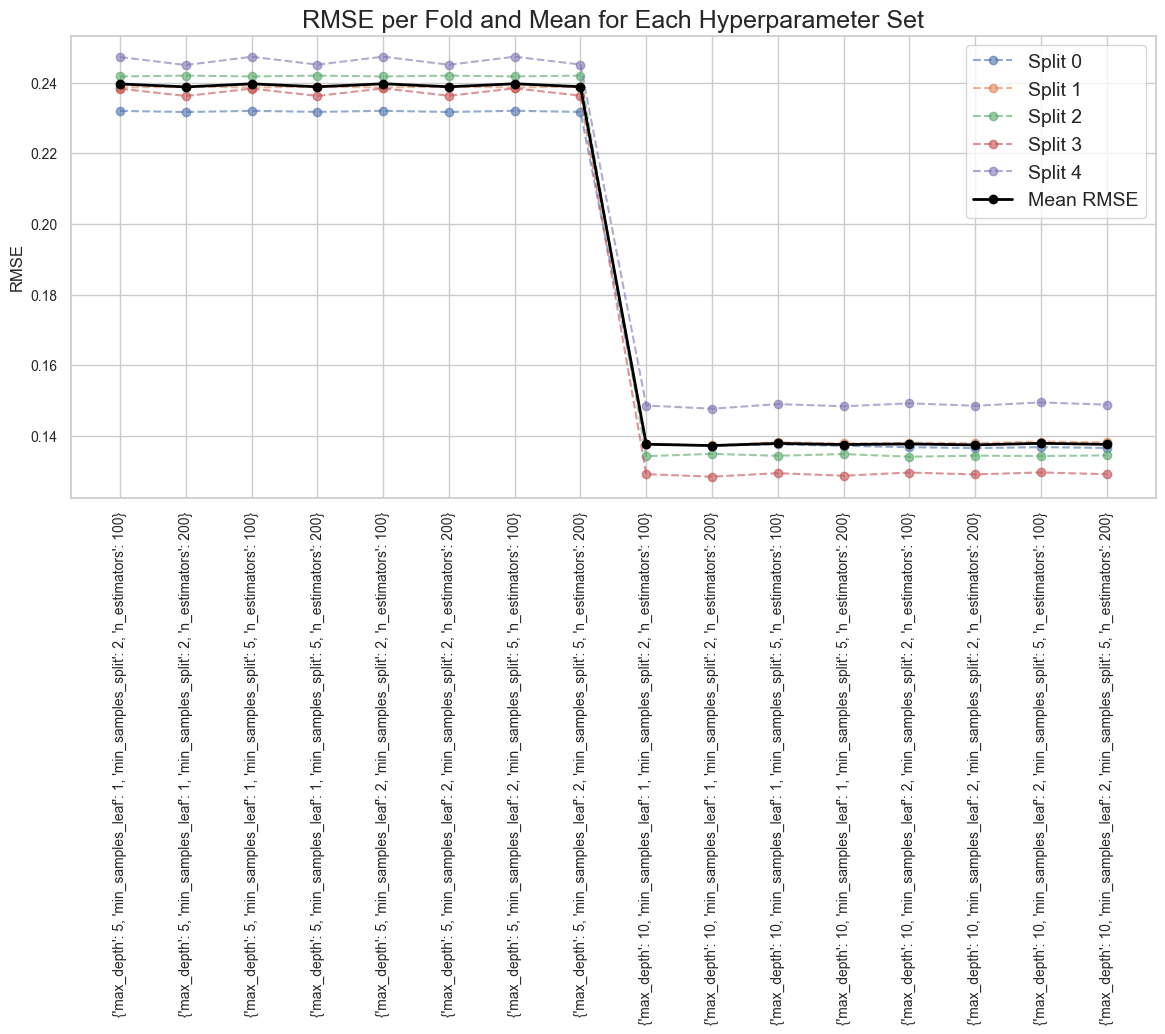

In [140]:
cv_results = pd.DataFrame(grid_search_rf.cv_results_)

# Th√™m t√™n param_set ƒë·ªÉ hi·ªÉn th·ªã tr√™n tr·ª•c x
cv_results['param_set'] = cv_results['params'].apply(lambda x: str(x))

# ƒê·ªïi neg_mean_squared_error v·ªÅ RMSE
for i in range(grid_search_rf.cv):
    cv_results[f'split{i}_rmse'] = np.sqrt(-cv_results[f'split{i}_test_score'])

cv_results['mean_rmse'] = np.sqrt(-cv_results['mean_test_score'])
plt.figure(figsize=(14, 6))

# V·∫Ω t·ª´ng fold
for i in range(grid_search_rf.cv):
    plt.plot(cv_results['param_set'], cv_results[f'split{i}_rmse'],
             marker='o', linestyle='--', alpha=0.6, label=f'Split {i}')

# V·∫Ω RMSE trung b√¨nh
plt.plot(cv_results['param_set'], cv_results['mean_rmse'],
         marker='o', color='black', linewidth=2, label='Mean RMSE')

plt.xticks(rotation=90)
plt.ylabel('RMSE')
plt.title('RMSE per Fold and Mean for Each Hyperparameter Set')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [141]:
y_pred_rf = best_rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"üìâ RMSE on test set: {rmse_rf:.2f}")
print(f"üìà R¬≤ on test set: {r2_rf:.4f}")

y_pred_true_rf = np.exp(y_pred_rf)
y_test_exp = np.exp(y_test)  
rmse_true_rf = np.sqrt(mean_squared_error(y_test_exp, y_pred_rf))
r2_true_rf = r2_score(y_test_exp, y_pred_rf)
print(f"üìâ RMSE on test set (true scale): {rmse_true_rf:.2f}")
print(f"üìà R¬≤ on test set (true scale): {r2_true_rf:.4f}")

üìâ RMSE on test set: 0.14
üìà R¬≤ on test set: 0.9789
üìâ RMSE on test set (true scale): 13754.51
üìà R¬≤ on test set (true scale): -0.2085


#### XGBOOST

In [142]:
xgb = XGBRegressor(random_state=42)

# ƒê·ªãnh nghƒ©a l∆∞·ªõi si√™u tham s·ªë
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [ 5, 7,9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb,
                           cv=5, scoring='neg_mean_squared_error',
                           verbose=1, n_jobs=-1)

# Hu·∫•n luy·ªán
grid_search_xgb.fit(X_train, y_train)

# K·∫øt qu·∫£ t·ªët nh·∫•t
print("‚úÖ Best params:", grid_search_xgb.best_params_)
best_xgb = grid_search_xgb.best_estimator_
best_xgb.fit(X_train, y_train)



Fitting 5 folds for each of 72 candidates, totalling 360 fits
‚úÖ Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

C:\Users\quock\AppData\Local\Temp\ipykernel_40392\871243749.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


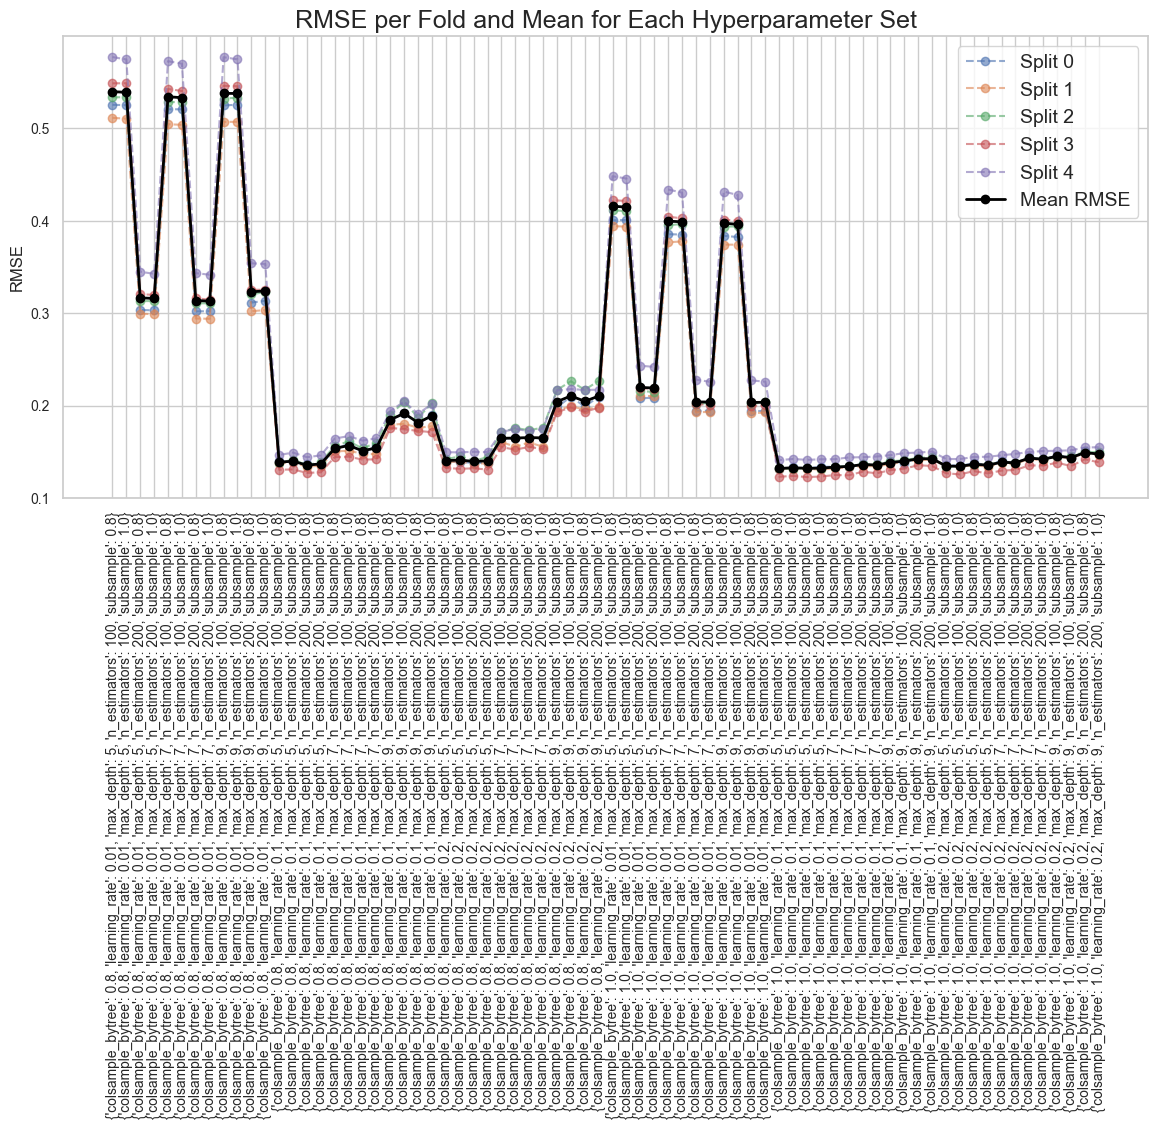

In [143]:
cv_results = pd.DataFrame(grid_search_xgb.cv_results_)

# Th√™m t√™n param_set ƒë·ªÉ hi·ªÉn th·ªã tr√™n tr·ª•c x
cv_results['param_set'] = cv_results['params'].apply(lambda x: str(x))

# ƒê·ªïi neg_mean_squared_error v·ªÅ RMSE
for i in range(grid_search_xgb.cv):
    cv_results[f'split{i}_rmse'] = np.sqrt(-cv_results[f'split{i}_test_score'])

cv_results['mean_rmse'] = np.sqrt(-cv_results['mean_test_score'])
plt.figure(figsize=(14, 6))

# V·∫Ω t·ª´ng fold
for i in range(grid_search_xgb.cv):
    plt.plot(cv_results['param_set'], cv_results[f'split{i}_rmse'],
             marker='o', linestyle='--', alpha=0.6, label=f'Split {i}')

# V·∫Ω RMSE trung b√¨nh
plt.plot(cv_results['param_set'], cv_results['mean_rmse'],
         marker='o', color='black', linewidth=2, label='Mean RMSE')

plt.xticks(rotation=90)
plt.ylabel('RMSE')
plt.title('RMSE per Fold and Mean for Each Hyperparameter Set')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [144]:
y_pred_xgb = best_xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"üìâ RMSE on test set: {rmse_xgb:.2f}")
print(f"üìà R¬≤ on test set: {r2_xgb:.4f}")

y_pred_true_xgb = np.exp(y_pred_xgb)
y_test_exp = np.exp(y_test)  
rmse_true_xgb = np.sqrt(mean_squared_error(y_test_exp, y_pred_true_xgb))
r2_true_xgb = r2_score(y_test_exp, y_pred_true_xgb)
print(f"üìâ RMSE on test set (true scale): {rmse_true_xgb:.2f}")
print(f"üìà R¬≤ on test set (true scale): {r2_true_xgb:.4f}")

üìâ RMSE on test set: 0.13
üìà R¬≤ on test set: 0.9806
üìâ RMSE on test set (true scale): 4642.74
üìà R¬≤ on test set (true scale): 0.8623


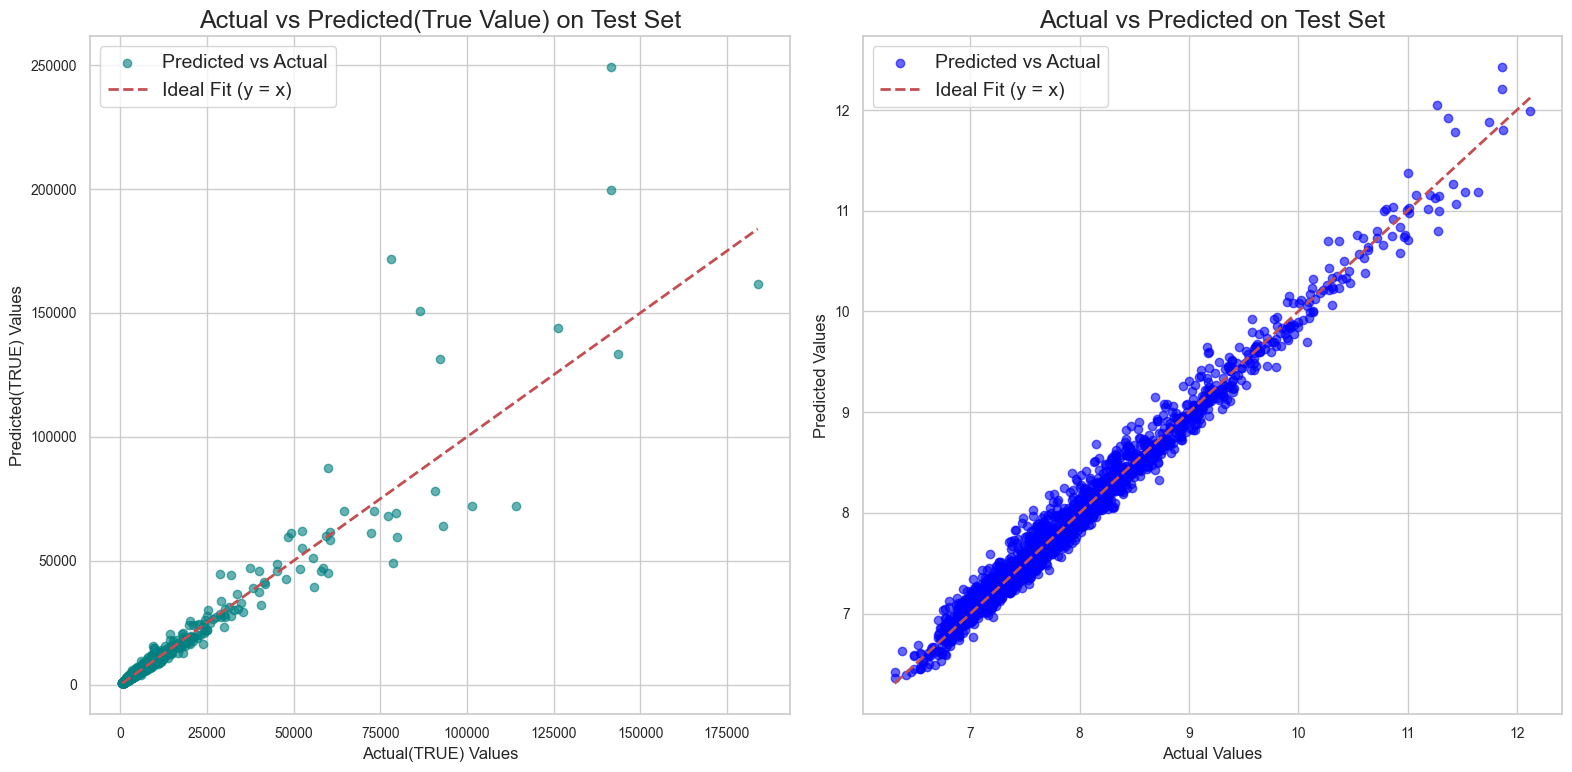

In [145]:

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(y_test_exp, y_pred_true_xgb, alpha=0.6, color='teal', label='Predicted vs Actual')
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], '--r', lw=2, label='Ideal Fit (y = x)')
plt.xlabel('Actual(TRUE) Values')
plt.ylabel('Predicted(TRUE) Values')
plt.title('Actual vs Predicted(True Value) on Test Set')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2, label='Ideal Fit (y = x)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted on Test Set')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()




#### LIGHTGBM

In [146]:
lgbm = lgb.LGBMRegressor(random_state=42)

# ƒê·ªãnh nghƒ©a l∆∞·ªõi si√™u tham s·ªë
param_grid_lgbm = {
    'num_leaves': [31, 50],
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm,
                               cv=5, scoring='neg_mean_squared_error',
                               verbose=1, n_jobs=-1)

# Hu·∫•n luy·ªán
grid_search_lgbm.fit(X_train, y_train)

# K·∫øt qu·∫£ t·ªët nh·∫•t
print("‚úÖ Best params:", grid_search_lgbm.best_params_)

# M√¥ h√¨nh v·ªõi tham s·ªë t·ªët nh·∫•t
best_lgbm = grid_search_lgbm.best_estimator_

# Hu·∫•n luy·ªán l·∫°i tr√™n to√†n b·ªô t·∫≠p train
best_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 7285, number of used features: 6
[LightGBM] [Info] Start training from score 8.018613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMRegressor(colsample_bytree=0.8, max_depth=5, n_estimators=200,
              num_leaves=50, random_state=42, subsample=0.8)

C:\Users\quock\AppData\Local\Temp\ipykernel_40392\4285346462.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


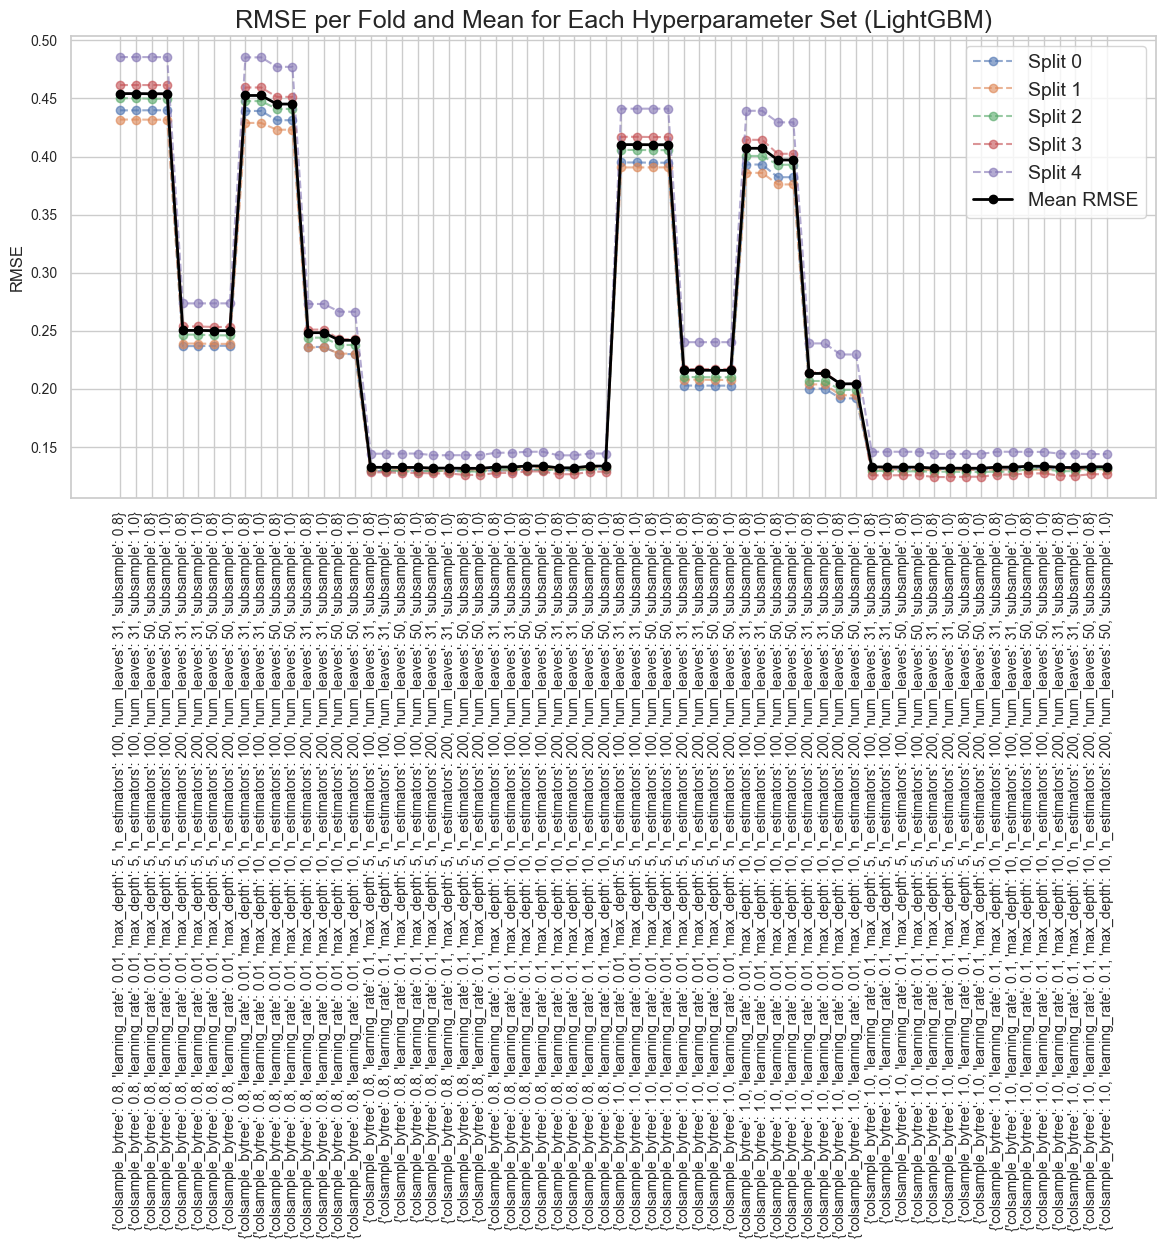

In [147]:
cv_results_lgbm = pd.DataFrame(grid_search_lgbm.cv_results_)

# Th√™m c·ªôt param_set ƒë·ªÉ hi·ªÉn th·ªã tr√™n tr·ª•c x
cv_results_lgbm['param_set'] = cv_results_lgbm['params'].apply(lambda x: str(x))

# ƒê·ªïi neg_mean_squared_error v·ªÅ RMSE cho t·ª´ng fold
for i in range(grid_search_lgbm.cv):
    cv_results_lgbm[f'split{i}_rmse'] = np.sqrt(-cv_results_lgbm[f'split{i}_test_score'])

# T√≠nh RMSE trung b√¨nh (mean_test_score l√† neg_mean_squared_error)
cv_results_lgbm['mean_rmse'] = np.sqrt(-cv_results_lgbm['mean_test_score'])

plt.figure(figsize=(14, 6))

# V·∫Ω RMSE t·ª´ng fold
for i in range(grid_search_lgbm.cv):
    plt.plot(cv_results_lgbm['param_set'], cv_results_lgbm[f'split{i}_rmse'],
             marker='o', linestyle='--', alpha=0.6, label=f'Split {i}')

# V·∫Ω RMSE trung b√¨nh
plt.plot(cv_results_lgbm['param_set'], cv_results_lgbm['mean_rmse'],
         marker='o', color='black', linewidth=2, label='Mean RMSE')

plt.xticks(rotation=90)
plt.ylabel('RMSE')
plt.title('RMSE per Fold and Mean for Each Hyperparameter Set (LightGBM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [148]:
# D·ª± ƒëo√°n tr√™n t·∫≠p test (log scale)
y_pred_lgbm = best_lgbm.predict(X_test)

# T√≠nh RMSE v√† R¬≤ tr√™n log scale
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"üìâ RMSE on test set (log scale): {rmse_lgbm:.2f}")
print(f"üìà R¬≤ on test set (log scale): {r2_lgbm:.4f}")

# Chuy·ªÉn d·ª± ƒëo√°n v√† y_test v·ªÅ thang ƒëo g·ªëc b·∫±ng exp()
y_pred_true_lgbm = np.exp(y_pred_lgbm)
y_test_exp = np.exp(y_test)

# T√≠nh RMSE v√† R¬≤ tr√™n thang ƒëo g·ªëc (true scale)
rmse_true_lgbm = np.sqrt(mean_squared_error(y_test_exp, y_pred_true_lgbm))
r2_true_lgbm = r2_score(y_test_exp, y_pred_true_lgbm)

print(f"üìâ RMSE on test set (true scale): {rmse_true_lgbm:.2f}")
print(f"üìà R¬≤ on test set (true scale): {r2_true_lgbm:.4f}")


üìâ RMSE on test set (log scale): 0.13
üìà R¬≤ on test set (log scale): 0.9807
üìâ RMSE on test set (true scale): 3939.42
üìà R¬≤ on test set (true scale): 0.9009


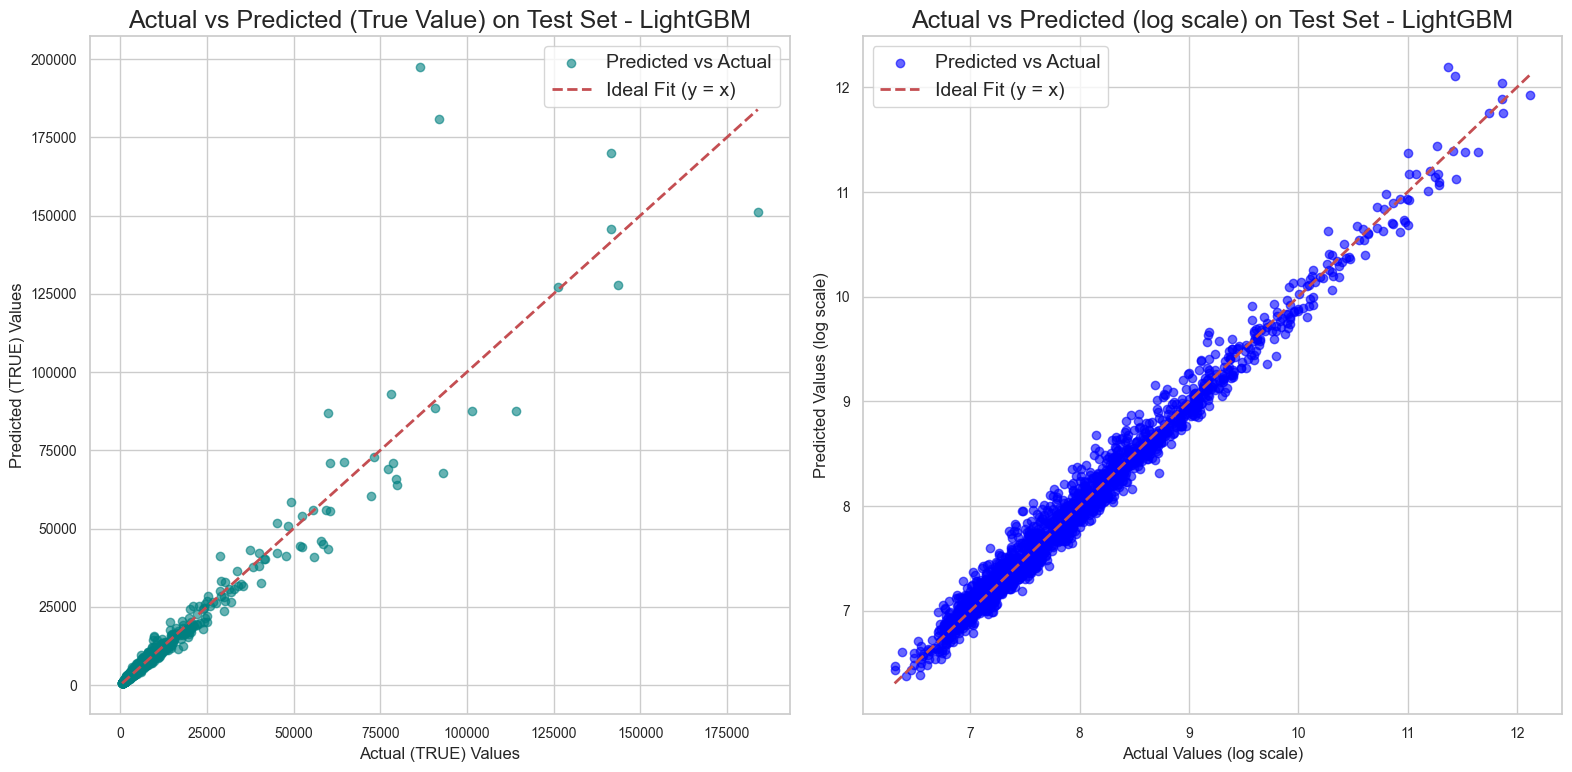

In [149]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.scatter(y_test_exp, np.exp(best_lgbm.predict(X_test)), alpha=0.6, color='teal', label='Predicted vs Actual')
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], '--r', lw=2, label='Ideal Fit (y = x)')
plt.xlabel('Actual (TRUE) Values')
plt.ylabel('Predicted (TRUE) Values')
plt.title('Actual vs Predicted (True Value) on Test Set - LightGBM')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, best_lgbm.predict(X_test), alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2, label='Ideal Fit (y = x)')
plt.xlabel('Actual Values (log scale)')
plt.ylabel('Predicted Values (log scale)')
plt.title('Actual vs Predicted (log scale) on Test Set - LightGBM')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### ƒê√ÅNH GI√Å M√î H√åNH

In [150]:
metrics_df = pd.DataFrame({
    'Model': ['XGBoost', 'XGBoost', 'LightGBM', 'LightGBM'],
    'Scale': ['log(price)', 'price', 'log(price)', 'price'],
    'RMSE': [rmse_xgb, rmse_true_xgb, rmse_lgbm, rmse_true_lgbm],
    'R2': [r2_xgb, r2_true_xgb, r2_lgbm, r2_true_lgbm]
})

print(metrics_df)


      Model       Scale         RMSE        R2
0   XGBoost  log(price)     0.132735  0.980559
1   XGBoost       price  4642.736770  0.862308
2  LightGBM  log(price)     0.132192  0.980718
3  LightGBM       price  3939.422311  0.900865


C:\Users\quock\AppData\Local\Temp\ipykernel_40392\487541137.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=metrics_df[metrics_df['Scale']=='log(price)'], x='Model', y='RMSE', palette='Set2')
C:\Users\quock\AppData\Local\Temp\ipykernel_40392\487541137.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=metrics_df[metrics_df['Scale']=='price'], x='Model', y='RMSE', palette='Set2')


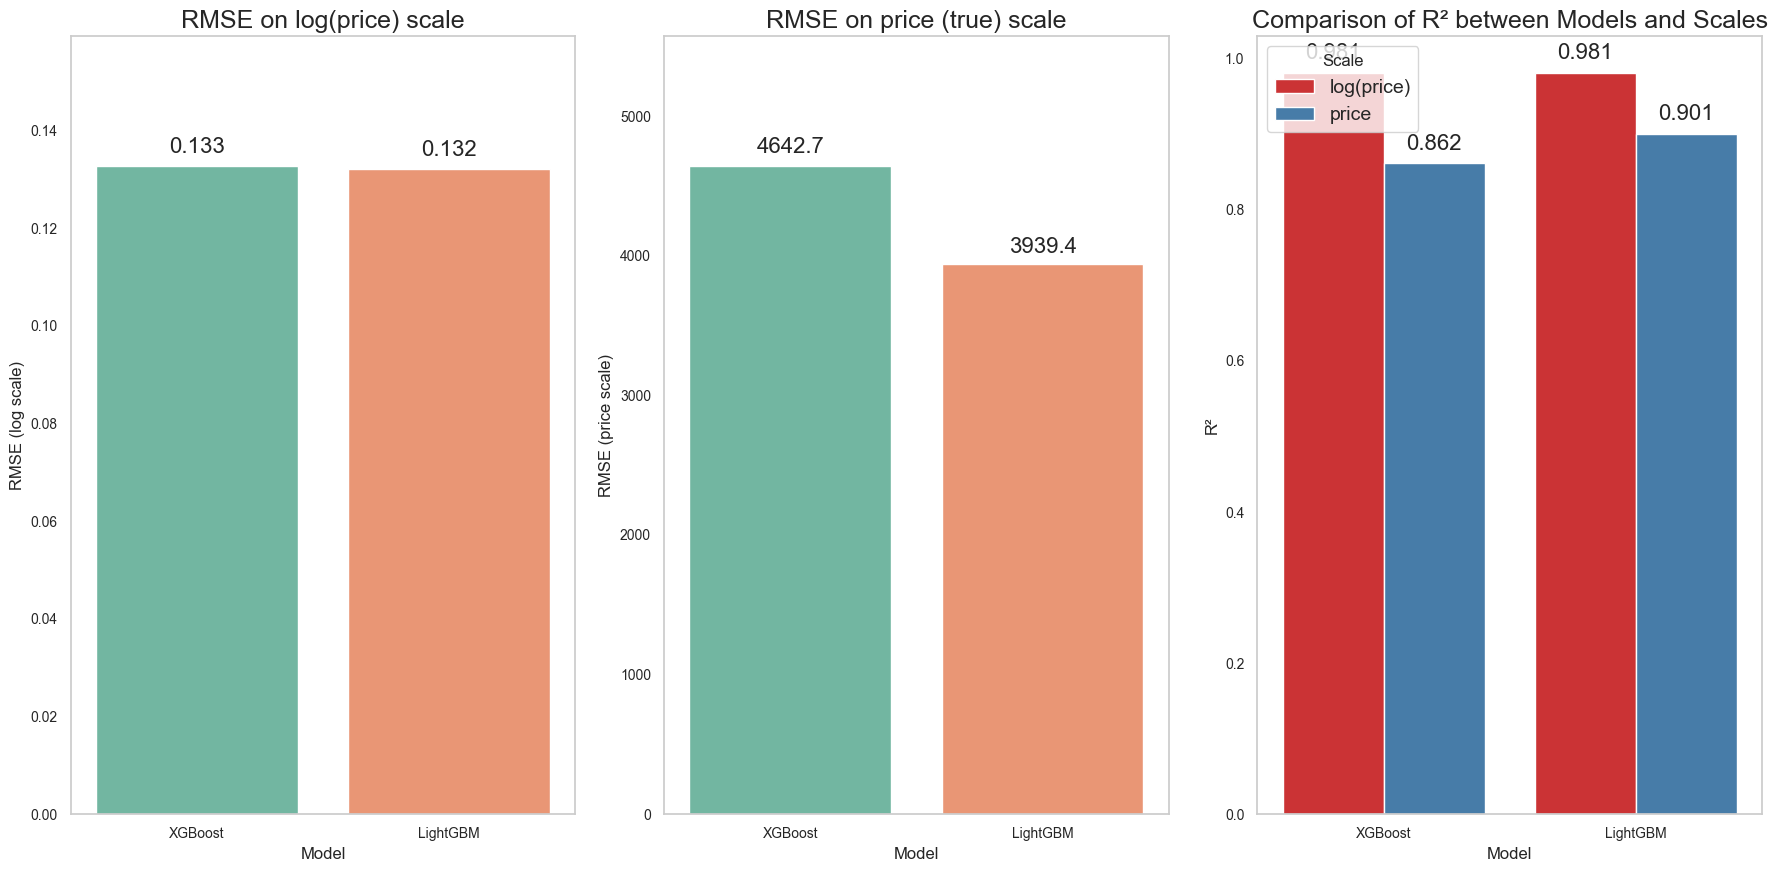

In [151]:


plt.figure(figsize=(18, 9))

# RMSE tr√™n log(price)
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=metrics_df[metrics_df['Scale']=='log(price)'], x='Model', y='RMSE', palette='Set2')
plt.title('RMSE on log(price) scale')
plt.ylabel('RMSE (log scale)')
plt.ylim(0, metrics_df[metrics_df['Scale']=='log(price)']['RMSE'].max()*1.2)
plt.grid(axis='y')

# Hi·ªÉn th·ªã gi√° tr·ªã tr√™n t·ª´ng c·ªôt
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2., height * 1.02,
             f'{height:.3f}', ha='center')

# RMSE tr√™n price (true scale)
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=metrics_df[metrics_df['Scale']=='price'], x='Model', y='RMSE', palette='Set2')
plt.title('RMSE on price (true) scale')
plt.ylabel('RMSE (price scale)')
plt.ylim(0, metrics_df[metrics_df['Scale']=='price']['RMSE'].max()*1.2)
plt.grid(axis='y')

# Hi·ªÉn th·ªã gi√° tr·ªã tr√™n t·ª´ng c·ªôt
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2., height * 1.02,
             f'{height:.1f}', ha='center')

# R¬≤ v·ªõi palette m√†u kh√°c h·∫≥n (v√≠ d·ª• Set1)
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=metrics_df, x='Model', y='R2', hue='Scale', palette='Set1')
plt.title('Comparison of R¬≤ between Models and Scales')
plt.ylabel('R¬≤')
plt.grid(axis='y')

# Hi·ªÉn th·ªã gi√° tr·ªã tr√™n t·ª´ng c·ªôt cho R¬≤
for p in ax3.patches:
    height = p.get_height()
    if height > 0:  # ƒë·ªÉ tr√°nh in nh·ªØng c·ªôt 0 ho·∫∑c √¢m kh√¥ng c·∫ßn thi·∫øt
        ax3.text(p.get_x() + p.get_width()/2., height * 1.02,
                 f'{height:.3f}', ha='center')

plt.tight_layout()
plt.show()




#### üìä K·∫øt Lu·∫≠n ƒê√°nh Gi√° M√¥ H√¨nh

1. **Hi·ªáu su·∫•t chung:**
   - C·∫£ hai m√¥ h√¨nh **XGBoost** v√† **LightGBM** ƒë·ªÅu ƒë·∫°t ƒë∆∞·ª£c k·∫øt qu·∫£ hu·∫•n luy·ªán t·ªët.

2. **ƒê√°nh gi√° tr√™n log(price):**
   - Sai s·ªë tuy·ªát ƒë·ªëi trung b√¨nh (RMSE) v√† h·ªá s·ªë x√°c ƒë·ªãnh (R¬≤) c·ªßa hai m√¥ h√¨nh g·∫ßn nh∆∞ t∆∞∆°ng ƒë∆∞∆°ng:
     - RMSE ‚âà 0.13
     - R¬≤ ‚âà 0.98

3. **ƒê√°nh gi√° tr√™n gi√° tr·ªã g·ªëc (price):**
   - **LightGBM** c√≥ ph·∫ßn nh·ªânh h∆°n so v·ªõi **XGBoost** v·ªÅ ƒë·ªô ch√≠nh x√°c:
     - RMSE: 3,939 (LightGBM) < 4,642 (XGBoost)
     - R¬≤: 0.901 (LightGBM) > 0.862 (XGBoost)
#### üéØ Quy·∫øt ƒê·ªãnh L·ª±a Ch·ªçn M√¥ H√¨nh

D·ª±a tr√™n k·∫øt qu·∫£ ƒë√°nh gi√°:

- M·∫∑c d√π c·∫£ hai m√¥ h√¨nh XGBoost v√† LightGBM ƒë·ªÅu cho hi·ªáu su·∫•t t·ªët tr√™n c·∫£ hai thang ƒëo log(price) v√† price,
- Nh∆∞ng **LightGBM** th·ªÉ hi·ªán ∆∞u th·∫ø h∆°n v·ªÅ:
  - Sai s·ªë RMSE th·∫•p h∆°n tr√™n gi√° tr·ªã g·ªëc (price),
  - H·ªá s·ªë x√°c ƒë·ªãnh R¬≤ cao h∆°n, ph·∫£n √°nh kh·∫£ nƒÉng d·ª± b√°o ch√≠nh x√°c h∆°n.
  - **LightGBM** t·ªëi ∆∞u b·ªô nh·ªõ v√† t·ªëc ƒë·ªô hu·∫•n luy·ªán h∆°n.

**V√¨ v·∫≠y, m√¥ h√¨nh LightGBM ƒë∆∞·ª£c l·ª±a ch·ªçn l√†m gi·∫£i ph√°p ch√≠nh cho b√†i to√°n h·ªìi quy n√†y.**



## PH√ÇN C·ª§M

In [ ]:
X =df.drop(['price','carat','y','z',], axis=1)  

In [153]:
X.head()

color clarity        cut  table  depth     x
0     G     SI2  Excellent   58.0   62.2  5.20
1     F     SI1  Excellent   57.0   62.1  5.13
2     E     SI1  Excellent   60.0   60.8  5.09
3     E     SI1  Excellent   61.0   60.7  5.13
4     H     VS2  Excellent   57.0   63.3  5.03

#### DATA ENCODING

In [154]:
X['cut'] = encoder_cut.transform(X[['cut']])
X['color'] = encoder_color.transform(X[['color']])
X['clarity'] = encoder_clarity.transform(X[['clarity']])


In [155]:
X.head()

color  clarity  cut  table  depth     x
0    6.0      0.0  4.0   58.0   62.2  5.20
1    7.0      1.0  4.0   57.0   62.1  5.13
2    8.0      1.0  4.0   60.0   60.8  5.09
3    8.0      1.0  4.0   61.0   60.7  5.13
4    5.0      2.0  4.0   57.0   63.3  5.03

#### NORMALIZATION - MIN_MAXSCALER

In [156]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [157]:
print(X_scaled)


[[0.66666667 0.         1.         0.45454545 0.60759494 0.03459821]
 [0.77777778 0.16666667 1.         0.36363636 0.59493671 0.02678571]
 [0.88888889 0.16666667 1.         0.63636364 0.43037975 0.02232143]
 ...
 [0.44444444 1.         1.         0.36363636 0.65822785 0.16741071]
 [0.88888889 0.33333333 0.         0.27272727 1.         0.3203125 ]
 [0.77777778 0.33333333 0.         0.36363636 0.96202532 0.140625  ]]


#### KMEANS

In [158]:
best_k = 0
best_score = -1
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    if score > best_score:
        best_k = k
        best_score = score

# Hu·∫•n luy·ªán KMeans v·ªõi k t·ªëi ∆∞u
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)
print(f"Best k for KMeans: {best_k} with silhouette score: {best_score:.4f}")


Best k for KMeans: 2 with silhouette score: 0.5125


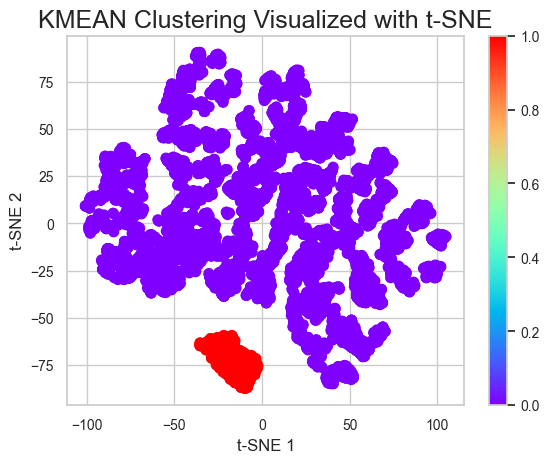

In [159]:
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_kmeans, cmap='rainbow', s=50)
plt.title("KMEAN Clustering Visualized with t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar()
plt.show()

In [160]:
X_kmeans = df.copy()
X_kmeans['cluster'] = labels_kmeans
numerical_cols_kmeans = [ 'depth', 'table', 'x' , 'price']
categorical_cols_kmeans = ['cut' , 'color', 'clarity']



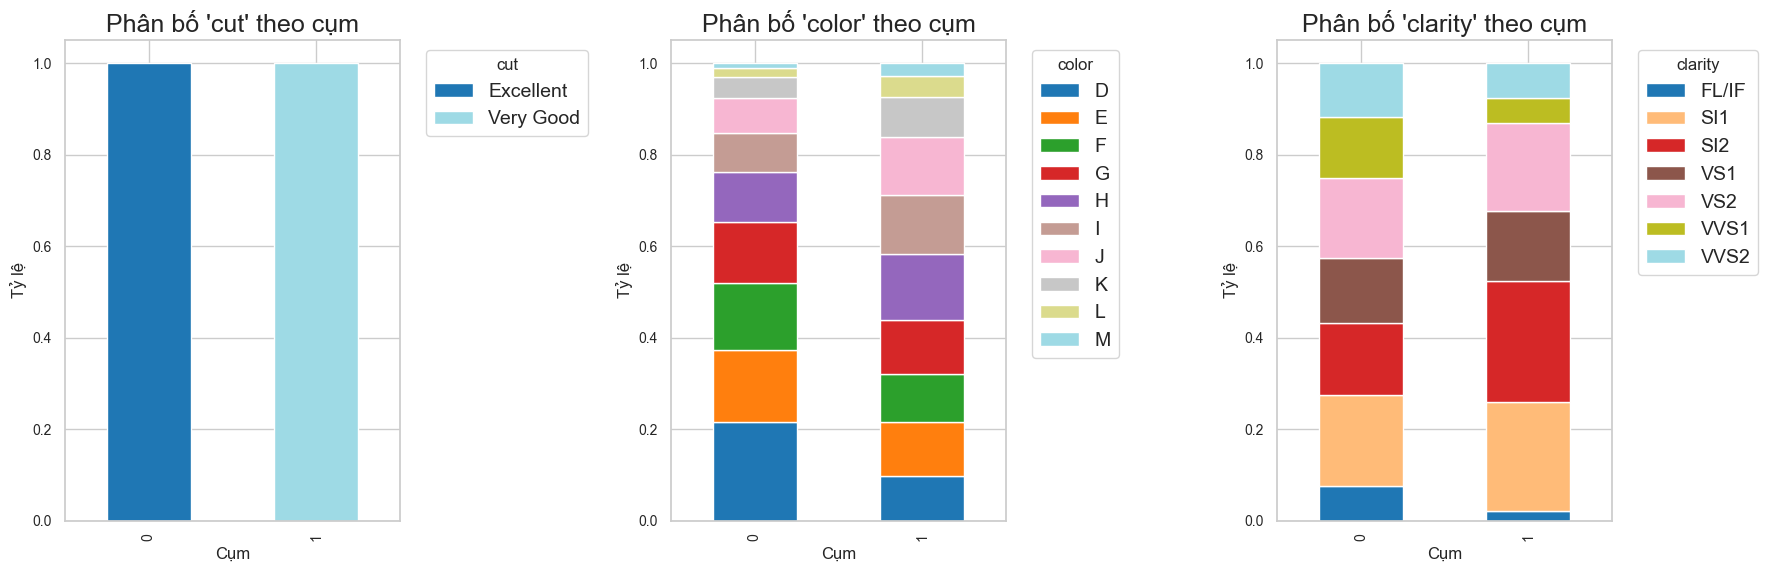

In [161]:
num_cats = len(categorical_cols_kmeans)

# T·∫°o figure v√† c√°c subplot
fig, axes = plt.subplots(nrows=1, ncols=num_cats, figsize=(6 * num_cats, 6))  # TƒÉng chi·ªÅu ngang theo s·ªë bi·∫øn

# N·∫øu ch·ªâ c√≥ 1 bi·∫øn th√¨ axes kh√¥ng ph·∫£i list, c·∫ßn chuy·ªÉn
if num_cats == 1:
    axes = [axes]

# V·∫Ω t·ª´ng bi·ªÉu ƒë·ªì stacked bar l√™n t·ª´ng subplot
for i, col in enumerate(categorical_cols_kmeans):
    dist = X_kmeans.groupby('cluster')[col].value_counts(normalize=True).unstack(fill_value=0)
    dist.plot(kind='bar', stacked=True, ax=axes[i], colormap='tab20')
    axes[i].set_title(f"Ph√¢n b·ªë '{col}' theo c·ª•m")
    axes[i].set_xlabel("C·ª•m")
    axes[i].set_ylabel("T·ª∑ l·ªá")
    axes[i].legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

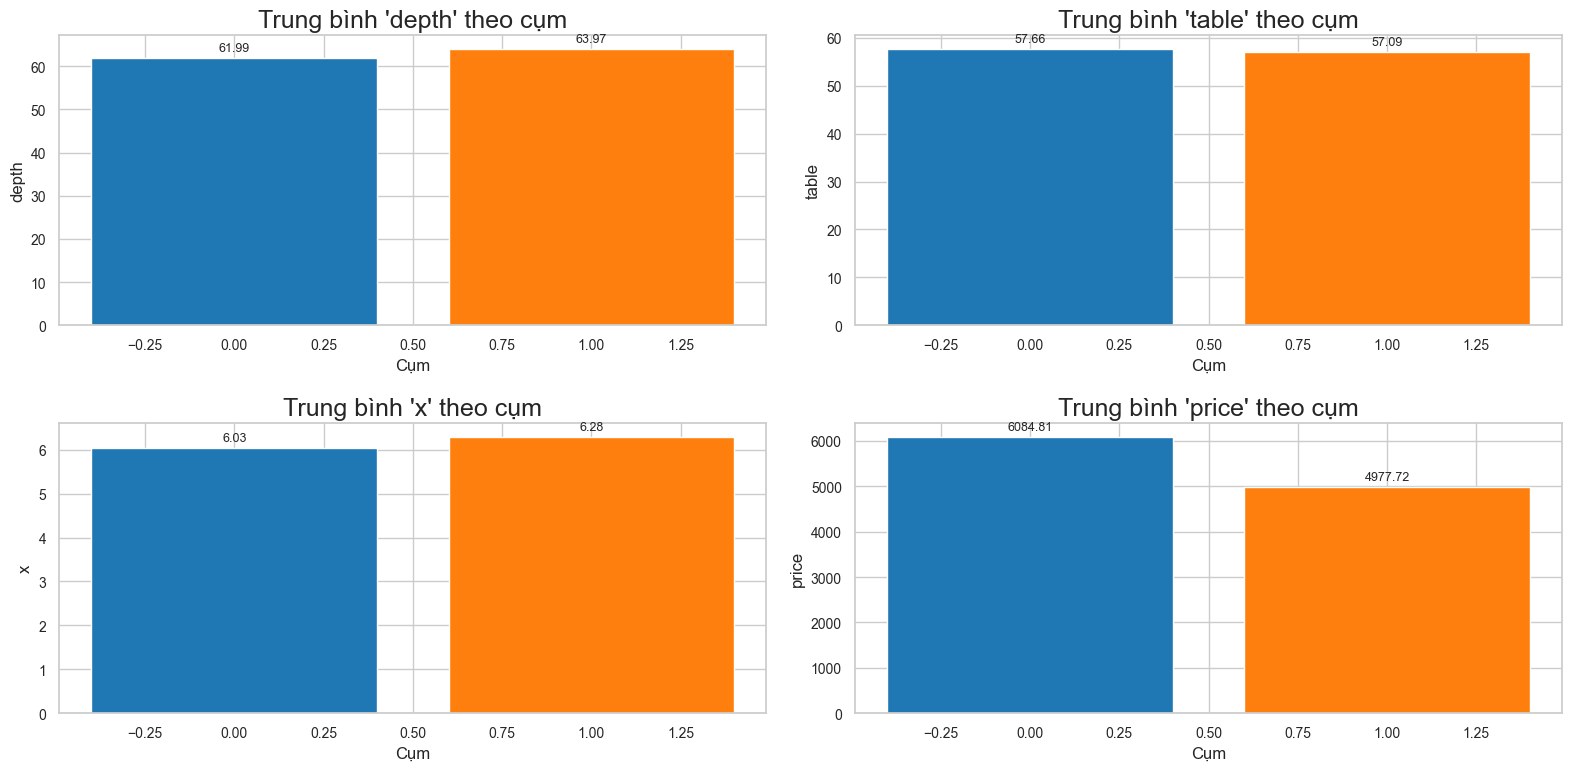

In [162]:
means = X_kmeans.groupby('cluster')[numerical_cols_kmeans].mean()
num_vars = len(numerical_cols_kmeans)

# T·∫°o figure v√† axes
fig, axes = plt.subplots(nrows=2, ncols=(num_vars + 1) // 2, figsize=(16, 8))
axes = axes.flatten()

# M√†u xen k·∫Ω
colors = ['#1f77b4', '#ff7f0e']  # B·∫°n c√≥ th·ªÉ m·ªü r·ªông n·∫øu c√≥ nhi·ªÅu c·ª•m

for i, col in enumerate(numerical_cols_kmeans):
    ax = axes[i]
    bars = ax.bar(means.index, means[col], color=[colors[j % len(colors)] for j in range(len(means.index))])
    
    ax.set_title(f"Trung b√¨nh '{col}' theo c·ª•m")
    ax.set_xlabel("C·ª•m")
    ax.set_ylabel(col)
    
    # Th√™m nh√£n gi√° tr·ªã l√™n c·ªôt
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # kho·∫£ng c√°ch tr√™n c·ªôt
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# ·∫®n subplot d∆∞ n·∫øu c√≥
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### DBSCAN

In [163]:
best_score = -1
best_eps = 0
for eps in np.arange(0.1, 0.8, 0.05):
    dbscan = DBSCAN(eps=eps, min_samples=4)
    labels = dbscan.fit_predict(X_scaled)
    
    # b·ªè qua n·∫øu to√†n b·ªô ƒëi·ªÉm b·ªã g√°n l√† noise
    if len(set(labels)) > 1 and -1 not in labels:
        score = silhouette_score(X_scaled, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
        print(f"eps={eps:.2f}, Silhouette={score:.4f}")

print(f"\nBest eps = {best_eps:.2f} with Silhouette = {best_score:.4f}")



eps=0.45, Silhouette=0.5125
eps=0.50, Silhouette=0.5125
eps=0.55, Silhouette=0.5125
eps=0.60, Silhouette=0.5125
eps=0.65, Silhouette=0.5125
eps=0.70, Silhouette=0.5125
eps=0.75, Silhouette=0.5125

Best eps = 0.45 with Silhouette = 0.5125


In [164]:
dbscan = DBSCAN(eps=0.50, min_samples=4)
labels_dbscan = dbscan.fit_predict(X_scaled)

# DBSCAN c√≥ th·ªÉ t·∫°o ra nh√£n -1 (noise), n√™n c·∫ßn l·ªçc
n_clusters = len(set(labels_dbscan))
print(set(labels_dbscan))

if n_clusters > 1:
    score_dbscan = silhouette_score(X_scaled, labels_dbscan)
else:
    score_dbscan = -1
print(f"DBSCAN found {n_clusters} clusters with silhouette score: {score_dbscan:.4f}")

{np.int64(0), np.int64(1)}
DBSCAN found 2 clusters with silhouette score: 0.5125


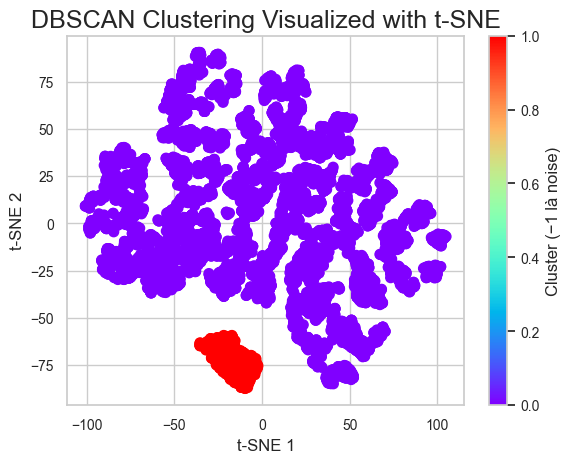

In [165]:


plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_dbscan, cmap='rainbow', s=50)
plt.title("DBSCAN Clustering Visualized with t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="Cluster (‚àí1 l√† noise)")
plt.show()

### ƒê√ÅNH GI√Å M√î H√åNH
##### üìå 1. Silhouette Score

**√ù nghƒ©a**:  
Silhouette Score ƒë√°nh gi√° *m·ª©c ƒë·ªô t√°ch bi·ªát v√† g·∫Øn k·∫øt* c·ªßa c√°c c·ª•m. M·ªói ƒëi·ªÉm d·ªØ li·ªáu c√≥ m·ªôt ch·ªâ s·ªë silhouette th·ªÉ hi·ªán m·ª©c ƒë·ªô ph√π h·ª£p v·ªõi c·ª•m c·ªßa n√≥ so v·ªõi c√°c c·ª•m kh√°c.

**C√¥ng th·ª©c**:

$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$

Trong ƒë√≥:
- $ a(i) $: kho·∫£ng c√°ch trung b√¨nh t·ª´ ƒëi·ªÉm $ i $ ƒë·∫øn c√°c ƒëi·ªÉm kh√°c trong **c√πng c·ª•m**.  
- $ b(i) $: kho·∫£ng c√°ch trung b√¨nh t·ª´ ƒëi·ªÉm $ i $ ƒë·∫øn c√°c ƒëi·ªÉm trong **c·ª•m g·∫ßn nh·∫•t kh√°c**.

**Gi√° tr·ªã n·∫±m trong [-1, 1]**:
- $ \approx 1 $: ph√¢n c·ª•m t·ªët (ƒëi·ªÉm g·∫ßn c·ª•m c·ªßa n√≥ v√† xa c·ª•m kh√°c).
- $ \approx 0 $: ƒëi·ªÉm ·ªü ranh gi·ªõi gi·ªØa c√°c c·ª•m.
- $ < 0 $: ƒëi·ªÉm c√≥ th·ªÉ b·ªã g√°n sai c·ª•m.

üëâ **C√†ng cao c√†ng t·ªët**.

---

##### üìå 2. Davies-Bouldin Index (DBI)

**√ù nghƒ©a**:  
Ch·ªâ s·ªë **Davies-Bouldin (DBI)** ƒëo m·ª©c ƒë·ªô **ch·ªìng l·∫•n gi·ªØa c√°c c·ª•m** trong ph√¢n c·ª•m.

- **DBI th·∫•p** ‚Üí c√°c c·ª•m **t√°ch bi·ªát r√µ r√†ng**, d·ªØ li·ªáu ph√¢n c·ª•m **t·ªët**.
- **DBI cao** ‚Üí c√°c c·ª•m **ph√¢n t√°n ho·∫∑c g·∫ßn nhau**, d·ªÖ **ch·ªìng l·∫•n**, ph√¢n c·ª•m **k√©m hi·ªáu qu·∫£**.

**C√¥ng th·ª©c**:

$
DBI = \frac{1}{k} \sum_{i=1}^k \max_{j \neq i} \left( \frac{s_i + s_j}{d_{ij}} \right)
$

Trong ƒë√≥:
- $ s_i $: ƒë·ªô ph√¢n t√°n trong c·ª•m $ i $ (v√≠ d·ª•: kho·∫£ng c√°ch trung b√¨nh gi·ªØa c√°c ƒëi·ªÉm v·ªõi centroid).
- $ d_{ij} $: kho·∫£ng c√°ch gi·ªØa t√¢m c·ªßa c·ª•m $ i $ v√† c·ª•m $ j $.
- $ k $: s·ªë c·ª•m.

**Gi√° tr·ªã DBI ‚â• 0**:
- **C√†ng th·∫•p c√†ng t·ªët**: c√°c c·ª•m c√†ng kh√°c nhau v√† c√¥ ƒë·ªçng h∆°n.

---

##### üß† So s√°nh nhanh

| Metric               | Thang ƒëi·ªÉm   | M·ª•c ti√™u     | Di·ªÖn gi·∫£i                             |
|----------------------|---------------|--------------|----------------------------------------|
| Silhouette Score     | -1 ‚Üí 1        | Maximize     | Cao: c·ª•m r√µ r√†ng, t√°ch bi·ªát            |
| Davies-Bouldin Index | ‚â• 0           | Minimize     | Th·∫•p: c·ª•m nh·ªè g·ªçn v√† ph√¢n t√°ch t·ªët     |


In [166]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# ƒê√°nh gi√° KMeans
sil_k = silhouette_score(X_scaled, labels_kmeans)
db_k = davies_bouldin_score(X_scaled, labels_kmeans)


# ƒê√°nh gi√° DBSCAN
if n_clusters > 1:
    sil_d = silhouette_score(X_scaled, labels_dbscan)
    db_d = davies_bouldin_score(X_scaled, labels_dbscan)
    
else:
    sil_d = db_d = ch_d = -1  # Kh√¥ng ƒë·ªß c·ª•m ƒë·ªÉ t√≠nh

In [167]:
print(f"KMeans: Silhouette={sil_k:.4f}, Davies-Bouldin={db_k:.4f}")
print(f"DBSCAN: Silhouette={sil_d:.4f}, Davies-Bouldin={db_d:.4f}")


KMeans: Silhouette=0.5125, Davies-Bouldin=0.8166
DBSCAN: Silhouette=0.5125, Davies-Bouldin=0.8166


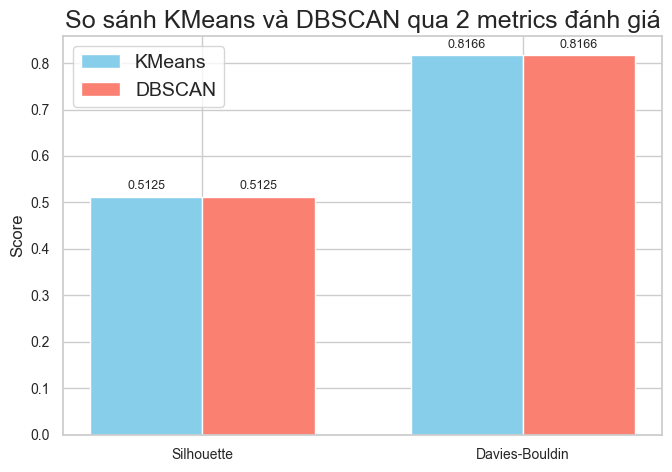

In [168]:

# T√™n metrics
metrics = ['Silhouette', 'Davies-Bouldin']
kmeans_scores = [sil_k, db_k]
dbscan_scores = [sil_d, db_d]

x = range(len(metrics))
bar_width = 0.35

plt.figure(figsize=(7, 5))

# V·∫Ω c·ªôt KMeans
bars1 = plt.bar(x, kmeans_scores, width=bar_width, label='KMeans', color='skyblue')
# V·∫Ω c·ªôt DBSCAN
bars2 = plt.bar([i + bar_width for i in x], dbscan_scores, width=bar_width, label='DBSCAN', color='salmon')

# Th√™m gi√° tr·ªã tr√™n ƒë·∫ßu m·ªói c·ªôt
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.4f}', 
             ha='center', va='bottom', fontsize=9)

# Thi·∫øt l·∫≠p tr·ª•c v√† ti√™u ƒë·ªÅ
plt.xticks([i + bar_width / 2 for i in x], metrics)
plt.ylabel('Score')
plt.title('So s√°nh KMeans v√† DBSCAN qua 2 metrics ƒë√°nh gi√°')
plt.legend()
plt.tight_layout()
plt.show()


**ƒê√°nh gi√° v√† Gi·∫£i th√≠ch K·∫øt qu·∫£ Ph√¢n c·ª•m Kim c∆∞∆°ng**

1. Nh·∫≠n x√©t v√† ƒê√°nh gi√°

Metrics Ph√¢n c·ª•m (Silhouette & Davies-Bouldin):
* **K-Means:** Silhouette = 0.5125, Davies-Bouldin = 0.8166
* **DBSCAN:** Silhouette = 0.5125, Davies-Bouldin = 0.8166
* **ƒê√°nh gi√°:** C·∫£ hai thu·∫≠t to√°n K-Means v√† DBSCAN cho ra k·∫øt qu·∫£ metrics **ho√†n to√†n gi·ªëng nhau**, ƒë·ªÅu ·ªü m·ª©c t·ªët (Silhouette > 0.5 v√† Davies-Bouldin th·∫•p).

Tr·ª±c quan h√≥a t-SNE:
* **K-Means & DBSCAN:** Hai bi·ªÉu ƒë·ªì t-SNE **gi·ªëng h·ªát nhau**, c√πng hi·ªÉn th·ªã m·ªôt c·ª•m nh·ªè ri√™ng bi·ªát v√† m·ªôt c·ª•m l·ªõn h∆°n. Kh√¥ng c√≥ d·∫•u hi·ªáu nhi·ªÖu r√µ r√†ng t·ª´ DBSCAN.
* **ƒê√°nh gi√°:** Tr·ª±c quan h√≥a x√°c nh·∫≠n c√°c nh√£n c·ª•m ƒë∆∞·ª£c t·∫°o ra b·ªüi hai thu·∫≠t to√°n l√† nh∆∞ nhau, cho th·∫•y m·ªôt c·∫•u tr√∫c c·ª•m r√µ r√†ng v√† ·ªïn ƒë·ªãnh.

2. Gi·∫£i th√≠ch

S·ª± tr√πng kh·ªõp tuy·ªát ƒë·ªëi v·ªÅ c·∫£ metrics l·∫´n h√¨nh ·∫£nh tr·ª±c quan t-SNE gi·ªØa K-Means v√† DBSCAN l√† do **d·ªØ li·ªáu c·ªßa b·∫°n c√≥ m·ªôt c·∫•u tr√∫c c·ª•m n·ªôi t·∫°i c·ª±c k·ª≥ m·∫°nh m·∫Ω v√† r√µ r√†ng**, bao g·ªìm hai c·ª•m ƒë∆∞·ª£c ph√¢n t√°ch r·∫•t t·ªët.

M·∫∑c d√π K-Means d·ª±a tr√™n kho·∫£ng c√°ch ƒë·∫øn t√¢m c·ª•m v√† DBSCAN d·ª±a tr√™n m·∫≠t ƒë·ªô, trong tr∆∞·ªùng h·ª£p n√†y, c·∫£ hai ƒë√£ **h·ªôi t·ª• v·ªÅ c√πng m·ªôt gi·∫£i ph√°p ph√¢n c·ª•m t·ªëi ∆∞u**. ƒêi·ªÅu n√†y c≈©ng ƒë∆∞·ª£c c·ªßng c·ªë b·ªüi vi·ªác DBSCAN kh√¥ng ph√°t hi·ªán ra ƒëi·ªÉm nhi·ªÖu (`-1`), ng·ª• √Ω r·∫±ng t·∫•t c·∫£ c√°c ƒëi·ªÉm ƒë·ªÅu thu·ªôc v·ªÅ m·ªôt trong hai c·ª•m ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a r√µ r√†ng.

Bi·∫øn **cut** ch·ªâ c√≥ 2 lo·∫°i l√† **Excellent** v√† **Good** g·∫ßn nh∆∞ l√† nguy√™n nh√¢n ch√≠nh d·∫´n ƒë·∫øn s·ª± r√µ r√†ng, t√°ch bi·ªát gi·ªØa 2 c·ª•m v√† s·ª± nh·∫•t qu√°t c·ªßa 2 m√¥ h√¨nh K-Means v√† DBSCAN
